In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [176]:
coffee_rating = pd.read_feather('/Users/mishudhar/Downloads/Sampling_In_Python/coffee_ratings_full.feather')

In [177]:
! pip install pyarrow

In [178]:
coffee_rating.head()

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,89.92,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,89.75,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",None,None,None,None,1600 - 1800 m,...,None,0.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,89.00,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,None,wolensu,None,yidnekachew debessa coffee plantation,1800-2200,...,Green,2.0,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,88.83,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [179]:
cofee_rating.shape

(1338, 43)

In [358]:
coffee_rating['country_of_origin'] = coffee_rating['country_of_origin'].astype('category')

# Points vs Flavor : Population

In [359]:
pts_vs_flavor_pop = cofee_rating[['total_cup_points', 'flavor']]
pts_vs_flavor_pop

,total_cup_points,flavor
0,90.58,8.83
1,89.92,8.67
2,89.75,8.50
3,89.00,8.58
4,88.83,8.50
...,...,...
1333,78.75,7.58
1334,78.08,7.67
1335,77.17,7.33
1336,75.08,6.83


# Pandas .sample method returns a random subset of rows

In [360]:
pts_vs_flavor_samp = pts_vs_flavor_pop.sample(n = 10)
pts_vs_flavor_samp

,total_cup_points,flavor
1089,80.33,7.25
1158,79.67,7.08
1268,76.17,7.00
506,83.00,7.67
659,82.50,7.42
817,81.92,7.50
1051,80.67,7.42
685,82.42,7.50
972,81.17,7.17
62,85.58,8.17


# .sample methods is also works


In [361]:
cup_points_samp = coffee_rating['total_cup_points'].sample(n = 10)
cup_points_samp

373     83.50
423     83.25
519     83.00
944     81.42
1108    80.17
79      85.33
947     81.42
398     83.33
1278    75.17
102     85.00
Name: total_cup_points, dtype: float64

# Population Parameters and point estimates
# A population parameter is a calculation made on the population dataset

In [362]:
np.mean(pts_vs_flavor_samp['total_cup_points'])

81.34299999999999

In [363]:
coffee_rating['total_cup_points'].mean()

82.15120328849018

In [364]:
np.mean(cup_points_samp)

82.159

In [365]:
spotify_population = pd.read_feather('/Users/mishudhar/Downloads/Sampling_In_Python/spotify_2000_2020.feather')
spotify_population.head()

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.97200,['David Bauer'],0.567,313293.0,5.221550,0.227,0.0,0w0D8H1ubRerCXHWYJkinO,0.601000,10.0,0.110,-13.441,1.0,Shout to the Lord,47.0,2000,0.0290,136.123,0.0396,2000.0
1,0.32100,['Etta James'],0.821,360240.0,6.004000,0.418,0.0,4JVeqfE2tpi7Pv63LJZtPh,0.000372,9.0,0.222,-9.841,0.0,Miss You,51.0,2000-12-12,0.0407,117.382,0.8030,2000.0
2,0.00659,['Quasimoto'],0.706,202507.0,3.375117,0.602,1.0,5pxtdhLAi0RTh1gNqhGMNA,0.000138,11.0,0.400,-8.306,0.0,Real Eyes,44.0,2000-06-13,0.3420,89.692,0.4790,2000.0
3,0.00390,['Millencolin'],0.368,173360.0,2.889333,0.977,0.0,3jRsoe4Vkxa4BMYqGHX8L0,0.000000,11.0,0.350,-2.757,0.0,Penguins & Polarbears,52.0,2000-02-22,0.1270,165.889,0.5480,2000.0
4,0.12200,['Steve Chou'],0.501,344200.0,5.736667,0.511,0.0,4mronxcllhfyhBRqyZi8kU,0.000000,7.0,0.279,-9.836,0.0,黃昏,53.0,2000-12-25,0.0291,78.045,0.1130,2000.0


In [366]:
spotify_population.shape

(41656, 20)

# Sample 1000 rows rows from spotify

In [367]:
# Sample 1000 rows rows from spotify
spotify_sample = spotify.sample(n = 1000)
spotify_sample

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
11571,0.00419,"['Waka Flocka Flame', 'Roscoe Dash', 'Wale']",0.668,263467.0,4.391117,0.651,0.0,70Wb2xKOAOte8iNkBpezQs,0.000000,1.0,0.3140,-5.407,1.0,No Hands (feat. Roscoe Dash and Wale),43.0,2010-10-05,0.0345,131.507,0.342,2010.0
37550,0.34400,['Los Invasores De Nuevo León'],0.800,202733.0,3.378883,0.620,0.0,4XKtNegKyGMCdgIdCxfcMQ,0.000000,0.0,0.1970,-6.357,1.0,Que Poca,46.0,2000-01-01,0.0275,104.189,0.952,2000.0
22236,0.07240,"['We The Kings', 'Elena Coats']",0.512,226330.0,3.772167,0.526,0.0,05CrK6Q5VGtfPDtyQFJ4Kf,0.000000,1.0,0.0675,-5.440,1.0,Sad Song (feat. Elena Coats),73.0,2013-01-01,0.0251,85.024,0.249,2013.0
4678,0.81300,['James Newton Howard'],0.140,271480.0,4.524667,0.116,0.0,5ynPIIbdGo2OBoX9vcnUo5,0.163000,7.0,0.2100,-22.882,0.0,The Gravel Road - Score,43.0,2004-01-01,0.0378,86.097,0.104,2004.0
12259,0.24400,['Rex Orange County'],0.399,238480.0,3.974667,0.468,1.0,28GbaBYFpYi1J61fXnGSfd,0.000168,2.0,0.1030,-8.646,1.0,Apricot Princess,60.0,2017-04-26,0.0336,111.884,0.249,2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,0.25900,"[""Blackmore's Night""]",0.711,216280.0,3.604667,0.554,0.0,0BF04q5kqVzOkLNqTAi5bk,0.000034,7.0,0.0832,-5.109,1.0,Loreley,48.0,2003-06-30,0.0347,114.967,0.746,2003.0
9573,0.64600,['Gerardo Ortiz'],0.371,187973.0,3.132883,0.860,0.0,0N9sBJBig8ToeFflB5KdsB,0.000000,5.0,0.4420,-1.986,1.0,El Mundo Es Tuyo (En Vivo),53.0,2011,0.1100,178.780,0.883,2011.0
25183,0.02300,['Relient K'],0.382,177600.0,2.960000,0.820,0.0,5pZXriIfUJ5G0MiuoIkiww,0.000000,10.0,0.1150,-5.269,1.0,Sadie Hawkins Dance,54.0,2001-08-28,0.1090,166.862,0.473,2001.0
27028,0.00245,['Kane Brown'],0.544,178987.0,2.983117,0.854,0.0,7epGknfpAlH1u33S71Ur1o,0.000001,4.0,0.2490,-4.968,0.0,Lose It,72.0,2019-11-01,0.0289,91.966,0.436,2019.0


In [368]:
# Calculate the mean duration in mins from spotify_population
mean_dur_pop = spotify_population['duration_minutes'].mean()

# Calculate the mean duration in mins from spotify_sample
mean_dur_samp = spotify_sample['duration_minutes'].mean()
print('Mean duration in Minutes_Population: ', mean_dur_pop)
print('Mean duration in Minutes_Sample: ', mean_dur_samp)

Mean duration in Minutes_Population:  3.8521519140899896
Mean duration in Minutes_Sample:  3.805599383333331


In [369]:
# Creating a pandas series
loudness_pop = spotify_population['loudness']
# Creating a sample of 100 rows from this series
loudness_samp = loudness_pop.sample(n = 100)

In [370]:
mean_loudness_pop = np.mean(loudness_pop)
mean_loudness_pop

-7.366856851353918

In [371]:
mean_loudness_samp = np.mean(loudness_samp)
mean_loudness_samp

-7.142669999999996

In [372]:
spotify_population['loudness'].sample(n =100).mean()

-6.803090000000001

# Convenience Sampling
# Bias Sampling

In [373]:
coffee_rating['total_cup_points'].max()

90.58

# Creating a histogram with range of ratings from 59 to 91 and binwidth 2. Note that the last number is exclusive so it is needed to mention 93-2 = 91.

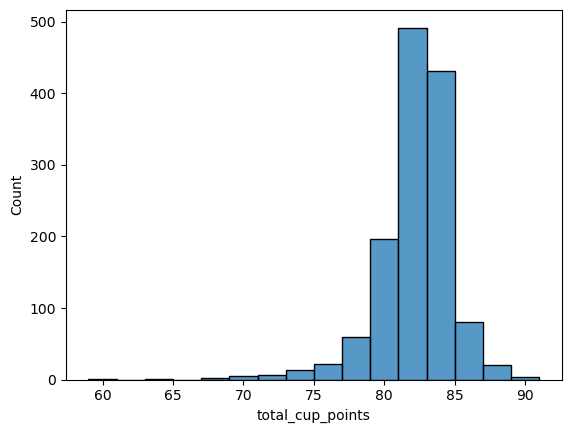

In [374]:
sns.histplot(data = coffee_rating, x = 'total_cup_points', bins = np.arange(59, 93, 2))
plt.show()

In [375]:
coffee_rating['total_cup_points'].min()

59.83

# For the first 10 rows

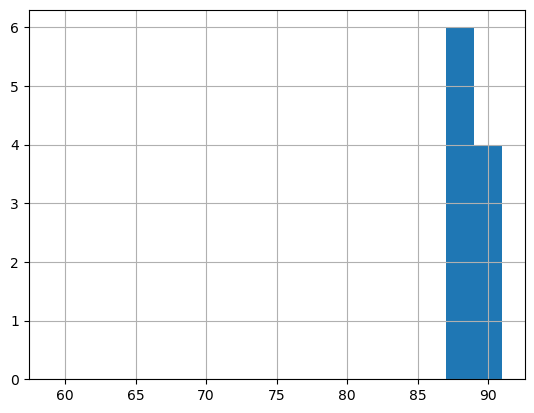

In [376]:
first_10 = coffee_rating.head(10)
first_10['total_cup_points'].hist(bins = np.arange(59, 93, 2))
plt.show()

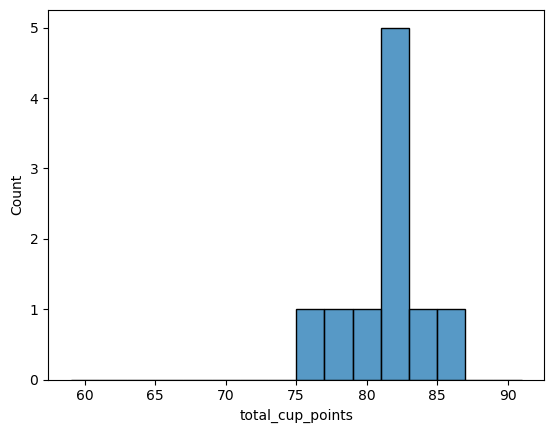

In [377]:
coffee_samp = coffee_rating.sample(n = 10)
sns.histplot(data = coffee_samp, x = 'total_cup_points', bins = np.arange(59, 93, 2))
plt.show()

In [378]:
print(spotify_population['acousticness'].min())
print(spotify_population['acousticness'].max())

0.0
0.996


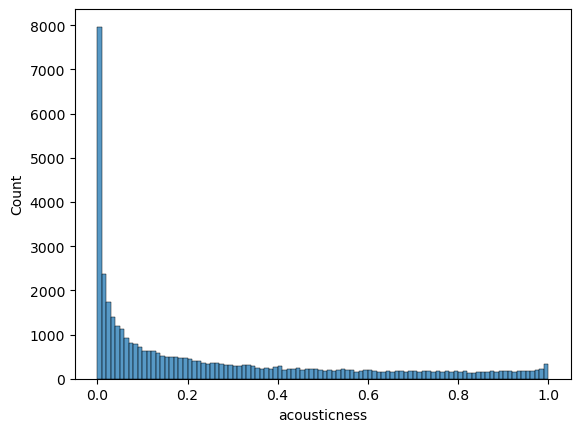

In [379]:
sns.histplot(data = spotify_population, x = 'acousticness', bins = np.arange(0, (1+0.01), 0.01))
plt.show()

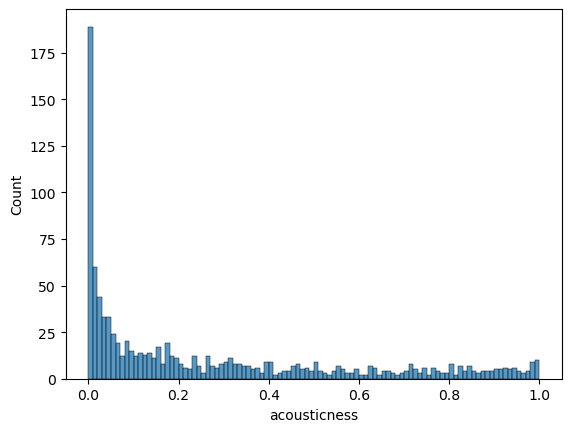

In [380]:
sns.histplot(data = spotify_Mysterious_sample, x = 'acousticness', bins = np.arange(0, (1+ 0.01), 0.01))
plt.show()

Loooks like both distribution is not similar. In the sample there are more ups and downs in the 'Acousticness'
# Lets try for duration_minutes

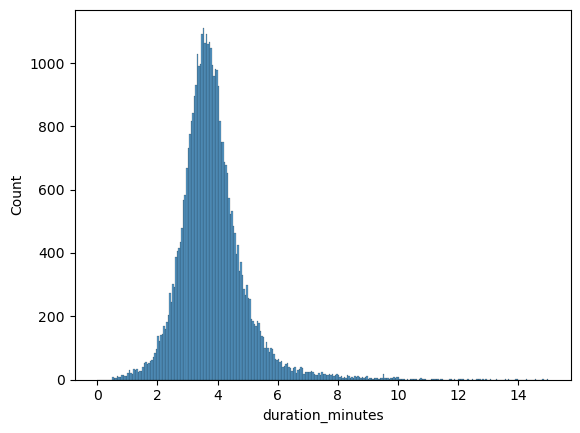

In [381]:
sns.histplot(data = spotify_population, x = 'duration_minutes', bins = np.arange(0, (15+ 0.05), 0.05))
plt.show()

In [382]:
spotify_Mysterious_sample.head()

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
10538,0.46100,['Dead Prez'],0.780,154160.0,2.569333,0.482,1.0,1XFRw25rwKCYk3KFqUQZjt,0.000000,2.0,0.2170,-8.600,0.0,Be Healthy,41.0,2000-02-08,0.3210,85.978,0.669,2000.0
32340,0.76400,"['Ben Cocks', 'Nikisha Reyes-Pile']",0.510,226986.0,3.783100,0.356,0.0,6eLOyOwKUJvjN0f9equFf8,0.018700,10.0,0.1160,-13.442,1.0,So Cold (The Good Wife Trailer),63.0,2010-11-16,0.0335,74.877,0.196,2010.0
29014,0.00258,['Riley Green'],0.616,194427.0,3.240450,0.877,0.0,7grWGhX8SHNmyGOkMNVMCt,0.000003,1.0,0.1140,-4.223,1.0,There Was This Girl,70.0,2019-09-20,0.0347,127.981,0.940,2019.0
35348,0.00450,['Jonas Brothers'],0.659,201960.0,3.366000,0.857,0.0,4zP7ADsgJgHGY6VzxbNp1z,0.000002,11.0,0.3350,-5.850,1.0,Year 3000,68.0,2019-05-09,0.0437,106.965,0.798,2019.0
17150,0.26300,['The Devil Makes Three'],0.965,214560.0,3.576000,0.782,0.0,1Yc76yuYuqwun1tOiElVU0,0.000016,9.0,0.0912,-5.771,0.0,Black Irish,39.0,2004-10-01,0.0349,116.943,0.970,2004.0


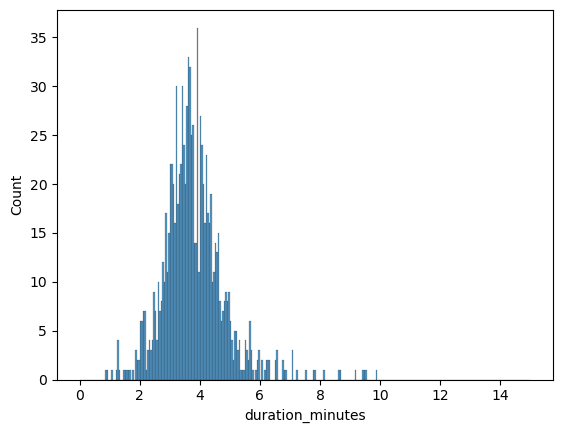

In [383]:
sns.histplot(data = spotify_Mysterious_sample, x = 'duration_minutes', bins = np.arange(0, (15+ 0.05), 0.05))
plt.show()

# Comment
the selected sample provides nearly similar distribution

# Pseudo Number Generation

# Each number appears to be random but it is calculated from the previous number. It is called pseudo random numbers.

In [384]:
randoms = np.random.beta(a = 2, b = 2, size = 5000)

In [385]:
randoms

array([0.60395098, 0.83872233, 0.8368699 , ..., 0.73217469, 0.60052887,
       0.56707706])

# This random numbers comes from a continuous distribution, so a great way to visualize them with a histogram.

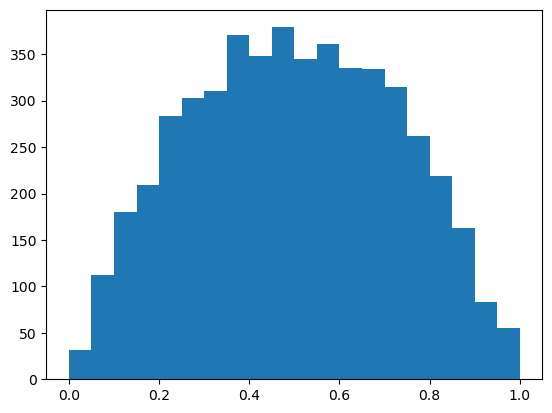

In [386]:
plt.hist(randoms, bins = np.arange(0, (1+0.05), 0.05))
plt.show()

In [387]:
type(randoms)

numpy.ndarray

# Normal distribution
1. Loc and Scale argument set the mean and standard deviation of the distribution
2. and the size argument determined how many numbers will be returned from this distribution.

In [388]:
np.random.seed(20001)
np.random.normal(loc = 2, scale = 1.5, size = 2)

array([0.93801384, 3.22811824])

In [389]:
np.random.normal(loc = 2, scale = 1.5, size = 2)

array([2.16869251, 3.4274484 ])

In [390]:
np.random.seed(20001)
np.random.normal(loc = 2, scale = 1.5, size = 2)

array([0.93801384, 3.22811824])

In [391]:
np.random.normal(loc = 2, scale = 1.5, size = 2)

array([2.16869251, 3.4274484 ])

# That means our codes are reproducible if we use the same seeds
Let's try a different seed

In [392]:
np.random.seed(1000)
np.random.normal(loc = 2, scale = 1.7, size = 3)

array([0.63242088, 2.54558363, 1.9566791 ])

In [393]:
np.random.normal(loc = 2, scale = 1.7, size = 3)

array([3.09535051, 1.48864566, 2.66210674])

In [394]:
np.random.seed(1000)
np.random.normal(loc = 2, scale = 1.7, size = 3)

array([0.63242088, 2.54558363, 1.9566791 ])

In [395]:

Normal = np.random.normal(loc = 2, scale = 1.7, size = 5000)
print(Normal.max())
print(Normal.min())

7.68823601125281
-4.485662440146322


In [396]:
# Unform distribution
uniforms = np.random.uniform(low = -3, high = 3, size = 5000)
uniforms

array([-2.34987083,  2.62164675,  2.14286365, ...,  0.24338435,
       -1.26459105,  2.10609373])

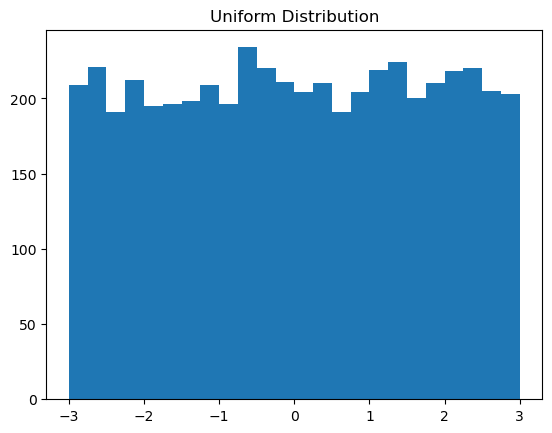

In [397]:
plt.hist(uniforms, bins = np.arange(-3, 3.25, 0.25))
plt.title('Uniform Distribution')
plt.show()

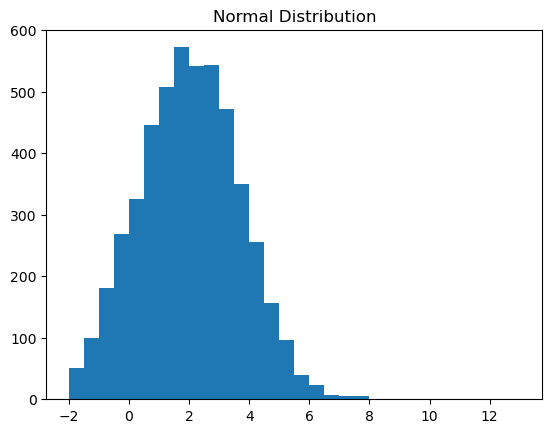

In [398]:
plt.hist(Normal, bins = np.arange(-2, 13.5, 0.5))
plt.title('Normal Distribution')
plt.show()

# Simple random and systemetic sampling

# Simple randoms sampling is like a raffle or lottery.
We start with our population of raffle tickets or lottery balls and randomly pick them out one at a time.However there is always chance that some tickets(rows of dataset) are selecetd fro side bynside. Or, sometimes a large number of area of dataset is not picked by this sampling.

In [399]:
coffee_rating.sample(n= 5, random_state = 12346)

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1009,81.00,Arabica,cqi taiwan icp cqi台灣合作夥伴,Taiwan,taiwan hao ka 台灣好咖莊園,None,taiwan hao ka 台灣好咖莊園,None,blossom valley宸嶧國際,1100 m,...,Green,0.0,"December 26th, 2014",Blossom Valley International,fc45352eee499d8470cf94c9827922fb745bf815,de73fc9412358b523d3a641501e542f31d2668b0,m,1100.00,1100.000,1100.000
483,83.08,Arabica,bourbon specialty coffees,Brazil,None,None,None,002/4542/0477,bourbon specialty coffees,None,...,Green,13.0,"April 19th, 2016",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,NaN,NaN,NaN
960,81.33,Arabica,hector gabriel barreda nader,Mexico,cruz verde,None,cruz verde,0,None,1000,...,None,4.0,"July 11th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,1000.00,1000.000,1000.000
813,82.00,Arabica,felipe isaza,Guatemala,conquista / morito,None,beneficio ixchel,11/23/0238,coffee resources inc.,4600 ft.,...,Green,10.0,"January 31st, 2013",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,1402.08,1402.080,1402.080
69,85.50,Arabica,juan luis alvarado romero,Guatemala,asoperc,None,beneficio exportacafe agua santa,11-52-492,exportcafe,5600-5760 metros,...,Green,1.0,"February 26th, 2014",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,ft,1706.88,1755.648,1731.264


# without the  random_state argument it will pick five different rows wach time. But with random_state the code is reproducible and will always provide the same slection(rows)

# Systematic Sampling
Without the random_state argument we will get different selction each time we run the code, this is called systematic Sampling. This samples population at a regular interval.

Systematic sampling in pandas is slightly trickier than simple random sampling in pandas. 

The tricky part is to determine how big the interval between each row should be for a given sample size.

In [400]:
# Suppose we want a sample size of five coffees
sample_size = 5
# The population size is the number of rows in the whole dataset
pop_size = len(coffee_rating)

# Because we want the answer to be an integer, we perform integer division with two forward slashes
interval = pop_size // sample_size
interval

267

# Thus to get a systematic sample of five coffees, we will select 267th row

In [401]:
coffee_rating.iloc[::interval]

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
267,83.92,Arabica,federacion nacional de cafeteros,Colombia,None,None,None,01-1969,federacion nacional de cafeteros,None,...,None,1.0,"March 11th, 2016",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,NaN,NaN,NaN
534,82.92,Arabica,consejo salvadoreño del café,El Salvador,santa josefita,1-198,beneficio cuzcachapa,09-030-273,soc. coop. cuzcachapa de r.l.,1350,...,Green,1.0,"August 28th, 2018",Salvadoran Coffee Council,3d4987e3b91399dbb3938b5bdf53893b6ef45be1,27b21e368fb8291cbea02c60623fe6c98f84524d,m,1350.0,1350.0,1350.0
801,82.00,Arabica,"lin, che-hao krude 林哲豪",Taiwan,"you siang coffee farmtainan, taiwan 台灣台南優香咖啡",None,"you siang coffee farmtainan, taiwan 台灣台南優香咖啡",Taiwan,"red on tree co., ltd.",600m,...,Green,0.0,"July 22nd, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,600.0,600.0,600.0
1068,80.50,Arabica,cqi taiwan icp cqi台灣合作夥伴,Taiwan,王秋金,1,non,None,王秋金,50,...,Blue-Green,0.0,"December 8th, 2018",Blossom Valley International,fc45352eee499d8470cf94c9827922fb745bf815,de73fc9412358b523d3a641501e542f31d2668b0,m,50.0,50.0,50.0
1335,77.17,Robusta,james moore,United States,fazenda cazengo,None,cafe cazengo,None,global opportunity fund,795 meters,...,None,6.0,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0


# There is a problem with systematic sampling though. Suppose we are interested in statistics about the aftertaste attribute of the coffees. To examine this first we use reset_index( ) to a create a column of index in our DataFrame then we plot


In [402]:
coffee_rating_with_id = coffee_rating.reset_index()
coffee_rating_with_id

,index,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,90.58,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,...,Green,0.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,89.92,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,...,Green,1.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,89.75,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",None,None,None,None,...,None,0.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,89.00,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,None,wolensu,None,yidnekachew debessa coffee plantation,...,Green,2.0,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,88.83,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,...,Green,2.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,1333,78.75,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,None,robustasa,...,Blue-Green,1.0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1334,1334,78.08,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,None,robustasa,...,Blue-Green,0.0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1335,1335,77.17,Robusta,james moore,United States,fazenda cazengo,None,cafe cazengo,None,global opportunity fund,...,None,6.0,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1336,1336,75.08,Robusta,cafe politico,India,None,None,None,14-1118-2014-0087,cafe politico,...,Green,1.0,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


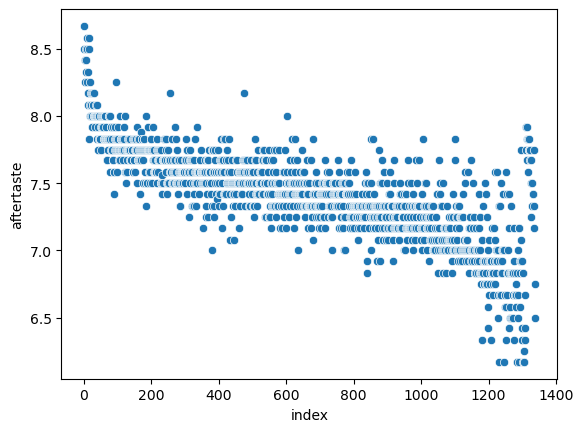

In [403]:
sns.scatterplot(data = coffee_rating_with_id, x = 'index', y = 'aftertaste')
plt.show()

# Earlier rows have the higher aftertaste scores than the laters. Which introduces bias.

# In general it is only safe to use systematic sampling if a plot like this has no pattern.

# To ensure that systematic sampling is safe, we can randomize the row order before sampling
Setting frac = 1, randomly sample the whole dataset. In effect, this randomly shuffle the whiole dataset

In [404]:
shuffled = coffee_rating.sample(frac = 1)
shuffled

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
518,83.00,Arabica,rosa aurora falcon fernandez,Mexico,vegas,None,"coatepec, ver",1104362909,None,750,...,Green,20.0,"July 26th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,750.0,750.0,750.0
899,81.58,Arabica,acacia hills ltd,"Tanzania, United Republic Of",acacia hills,None,acacia hills ltd,C30,acacia hills ltd,1800,...,Green,5.0,"December 18th, 2015",Africa Fine Coffee Association,073285c0d45e2f5539012d969937e529564fa6fe,c4ab13415cdd69376a93780c0166e7b1a10481ea,m,1800.0,1800.0,1800.0
1161,79.67,Arabica,fredy gordillo reyes,Mexico,union ramal santa cruz,None,union ramal santa cruz,2496,union ramal santa cruz spr de ri,1400,...,Green,6.0,"March 29th, 2014",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,1400.0,1400.0,1400.0
269,83.92,Arabica,cqi taiwan icp cqi台灣合作夥伴,Taiwan,神谷山莊園,None,神谷山莊園,Taiwan台灣,宸嶧國際,950公尺,...,Green,0.0,"November 23rd, 2015",Blossom Valley International,fc45352eee499d8470cf94c9827922fb745bf815,de73fc9412358b523d3a641501e542f31d2668b0,m,950.0,950.0,950.0
318,83.67,Arabica,ipanema coffees,Brazil,capoeirinha,008/16A,dry mill,002/1660/0106,ipanema coffees,934,...,Green,3.0,"August 16th, 2017",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,934.0,934.0,934.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,84.08,Arabica,carcafe ltda ci,Colombia,None,3-59-0503,neiva,3-59-0503,carcafe ltda,442,...,Green,3.0,"November 9th, 2018",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,442.0,442.0,442.0
245,84.00,Arabica,juan luis alvarado romero,Guatemala,el papaturro,None,beneficio ixchel,11/23/0535,"unex guatemala, s.a.",4000 psnm,...,Green,1.0,"August 8th, 2015",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,ft,1219.2,1219.2,1219.2
504,83.00,Arabica,juan luis alvarado romero,Guatemala,nueva granada,None,tradicional,11/326/19,"agricola nueva granada, s.a.",4500 pies,...,Green,2.0,"June 4th, 2016",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,ft,1371.6,1371.6,1371.6
1046,80.75,Arabica,diego manuel woolrich ramirez,Mexico,san josé y el portillo,None,san josé y el portillo,"1401325570, 1405822583, 1405822338",None,1200,...,Green,2.0,"September 4th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,1200.0,1200.0,1200.0


1. Next the indicess need to be reset from and start from zero again
1. reset_index(drop = True) will drop the previous indices
3. and reset_index() will put the new index beginning from 0

In [405]:
shuffled = shuffled.reset_index(drop = True).reset_index()

# Redrawing the previous plot


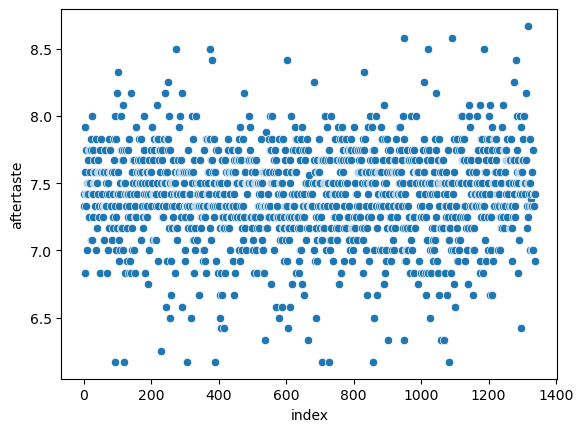

In [406]:
sns.scatterplot(data = shuffled, x = 'index', y = 'aftertaste')
plt.show()

In [407]:
attrition_pop = pd.read_feather('/Users/mishudhar/Downloads/Sampling_In_Python/attrition.feather')
attrition_pop.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
1,19,1.0,Travel_Rarely,528,Sales,22,Below_College,Marketing,Very_High,Male,...,Excellent,Very_High,0,0,2,Good,0,0,0,0
2,18,1.0,Travel_Rarely,230,Research_Development,3,Bachelor,Life_Sciences,High,Male,...,Excellent,High,0,0,2,Better,0,0,0,0
3,18,0.0,Travel_Rarely,812,Sales,10,Bachelor,Medical,Very_High,Female,...,Excellent,Low,0,0,2,Better,0,0,0,0
4,18,1.0,Travel_Frequently,1306,Sales,5,Bachelor,Marketing,Medium,Male,...,Excellent,Very_High,0,0,3,Better,0,0,0,0


In [408]:
# Sample 70 rows using simple random sampling and set the seed
attrition_samp = attrition_pop.sample(n = 70)

# Print the sample
print(attrition_samp)

      Age  Attrition     BusinessTravel  DailyRate            Department  \
416    31        0.0      Travel_Rarely        741  Research_Development   
557    37        0.0      Travel_Rarely        446  Research_Development   
604    33        0.0      Travel_Rarely       1242                 Sales   
1008   53        0.0      Travel_Rarely       1436                 Sales   
245    28        0.0      Travel_Rarely       1158  Research_Development   
...   ...        ...                ...        ...                   ...   
1350   52        0.0  Travel_Frequently        322  Research_Development   
1097   40        1.0      Travel_Rarely        676  Research_Development   
499    31        1.0  Travel_Frequently        561  Research_Development   
1245   47        0.0      Travel_Rarely        703                 Sales   
1028   46        0.0      Travel_Rarely        566  Research_Development   

      DistanceFromHome Education EducationField EnvironmentSatisfaction  \
416         

Notice that indexes in the sample are not in increases order always. They are just random rows.
# Simple random sampling

# one way to avoid randomness is Systematic Sampling. 

In [409]:
# set the sample size to 70
sample_size = 70
# Population Size
pop_size = len(attrition_pop)

interval = pop_size // sample_size

# Systematically Sample 70 rows
attrition_systematic_samp = attrition_pop[::interval]
attrition_systematic_samp

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
21,19,0.0,Travel_Rarely,1181,Research_Development,3,Below_College,Medical,Medium,Female,...,Excellent,Very_High,0,1,3,Better,1,0,0,0
42,45,0.0,Travel_Rarely,252,Research_Development,2,Bachelor,Life_Sciences,Medium,Female,...,Excellent,Very_High,0,1,3,Better,1,0,0,0
63,23,0.0,Travel_Rarely,373,Research_Development,1,College,Life_Sciences,Very_High,Male,...,Outstanding,Very_High,1,1,2,Better,1,0,0,1
84,30,1.0,Travel_Rarely,945,Sales,9,Bachelor,Medical,Medium,Male,...,Excellent,High,0,1,3,Good,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,48,0.0,Travel_Rarely,715,Research_Development,1,Bachelor,Life_Sciences,Very_High,Male,...,Excellent,High,0,25,3,Best,1,0,0,0
1386,48,0.0,Travel_Rarely,1355,Research_Development,4,Master,Life_Sciences,High,Male,...,Excellent,Medium,0,27,3,Better,15,11,4,8
1407,50,0.0,Travel_Rarely,989,Research_Development,7,College,Medical,Medium,Female,...,Excellent,Very_High,1,29,2,Good,27,3,13,8
1428,50,0.0,Non-Travel,881,Research_Development,2,Master,Life_Sciences,Low,Male,...,Excellent,Very_High,1,31,3,Better,31,6,14,7


Systematic smapling avoids randomness by picking rows at regular intervals.

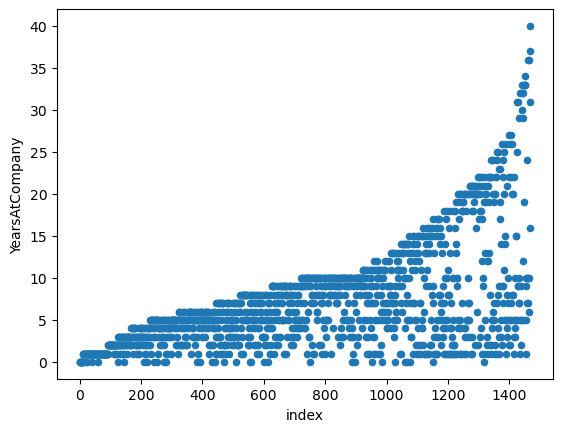

In [410]:
attrition = pd.read_feather('/Users/mishudhar/Downloads/Sampling_In_Python/attrition.feather')
# Add an index column to attrition
attrition_index = attrition.reset_index()
# Plot YearsAtComapny vs .index for attrition_index
attrition_index.plot(x = 'index', y = 'YearsAtCompany', kind = 'scatter')
plt.show()

There is a pattern and the selection is biased. Rows from the higher index have longer staying at company. 

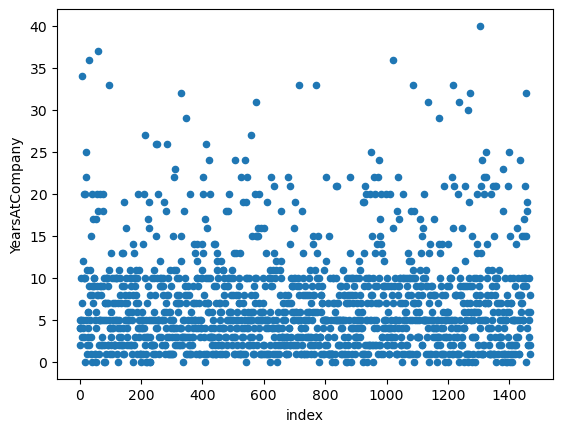

In [411]:
# Shuffled the rows of attrition 
attrition_shuffled = attrition.sample(frac = 1)
# Reset the row indexes and create an index
attrition_shuffled = attrition_shuffled.reset_index(drop = True).reset_index()
# Lets see the distribution again by creating a scatterplot
attrition_shuffled.plot(x = 'index', y = 'YearsAtCompany', kind = 'scatter')
plt.show()

# Stratified and Weighted random sampling

# Stratified Sampling
Stratified sampling is a technique that allows us to sample a population that contains subgroup.

In [412]:
top_counts = coffee_rating['country_of_origin'].value_counts()
top_counts.head(6)

Mexico                    236
Colombia                  183
Guatemala                 181
Brazil                    132
Taiwan                     75
United States (Hawaii)     73
Name: country_of_origin, dtype: int64

In [413]:
top_counted_countries = ['Mexico', 'Colombia', 'Guatemala', 'Brazil', 'Taiwan', 'United States (Hawaii)']
top_counted_subset = coffee_rating['country_of_origin'].isin(top_counted_countries)
top_counted_subset

0       False
1       False
2        True
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Name: country_of_origin, Length: 1338, dtype: bool

In [414]:
coffee_rating_top_country = coffee_rating[top_counted_subset]
coffee_rating_top_country

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
2,89.75,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",None,None,None,None,1600 - 1800 m,...,None,0.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.00,1800.00,1700.00
5,88.83,Arabica,ji-ae ahn,Brazil,None,None,None,None,None,None,...,Bluish-Green,1.0,"September 3rd, 2014",Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,m,NaN,NaN,NaN
13,87.92,Arabica,grounds for health admin,United States (Hawaii),arianna farms,None,None,None,None,2000 ft,...,None,2.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,609.60,609.60,609.60
22,87.17,Arabica,roberto licona franco,Mexico,la herradura,None,la herradura,0,None,1320,...,Green,0.0,"July 26th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,1320.00,1320.00,1320.00
25,86.92,Arabica,nucoffee,Brazil,fazenda kaquend,None,None,002/1251/0073,nucoffee,1250m,...,Green,2.0,"December 2nd, 2012",NUCOFFEE,567f200bcc17a90070cb952647bf88141ad9c80c,aa2ff513ffb9c844462a1fb07c599bce7f3bb53d,m,1250.00,1250.00,1250.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,71.00,Arabica,ricardo aaron sampieri marini,Mexico,la morena,None,"tlamatoca, hutusco, ver.",1104351023,None,1800,...,Green,0.0,"July 11th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,1800.00,1800.00,1800.00
1301,70.75,Arabica,kurt kappeli,Mexico,various,None,f.i.e.c.h.,0016-2847-0001,globus coffee,1000 meters,...,Green,1.0,"May 5th, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1000.00,1000.00,1000.00
1302,70.67,Arabica,volcafe ltda. - brasil,Brazil,None,2017/2018 - Lot 2,copag,None,volcafe ltda.,None,...,Green,55.0,"October 27th, 2018",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,NaN,NaN,NaN
1306,68.33,Arabica,juan carlos garcia lopez,Mexico,el centenario,None,"la esperanza, municipio juchique de ferrer, ve...",1104328663,terra mia,900,...,None,20.0,"September 17th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,900.00,900.00,900.00


Let's take a ten percent simple random sample of the dataset 

In [415]:
coffee_ratingTen_percent_sample = coffee_rating_top_country.sample(frac = 0.1, random_state = 2021)
# random_state argument to ensure reproducibility.

In [416]:
coffee_ratingTen_percent_sample['country_of_origin'].value_counts()

Mexico                          22
Guatemala                       18
Colombia                        16
Brazil                          16
United States (Hawaii)           9
Taiwan                           7
United States (Puerto Rico)      0
United States                    0
Uganda                           0
Thailand                         0
Vietnam                          0
Tanzania, United Republic Of     0
Rwanda                           0
Philippines                      0
Peru                             0
Papua New Guinea                 0
Panama                           0
Nicaragua                        0
Myanmar                          0
Mauritius                        0
Burundi                          0
Malawi                           0
Laos                             0
Kenya                            0
Japan                            0
Indonesia                        0
India                            0
Honduras                         0
Haiti               

To count the proportion

In [417]:
coffee_ratingTen_percent_sample['country_of_origin'].value_counts(normalize = True)

Mexico                          0.250000
Guatemala                       0.204545
Colombia                        0.181818
Brazil                          0.181818
United States (Hawaii)          0.102273
Taiwan                          0.079545
United States (Puerto Rico)     0.000000
United States                   0.000000
Uganda                          0.000000
Thailand                        0.000000
Vietnam                         0.000000
Tanzania, United Republic Of    0.000000
Rwanda                          0.000000
Philippines                     0.000000
Peru                            0.000000
Papua New Guinea                0.000000
Panama                          0.000000
Nicaragua                       0.000000
Myanmar                         0.000000
Mauritius                       0.000000
Burundi                         0.000000
Malawi                          0.000000
Laos                            0.000000
Kenya                           0.000000
Japan           

# Notice that in this sampling Taiwan is staying under United States where it stays above in the main population.

# Proportional Stratified Sampling
If we care about the proportions of each country in the sample closly matching those in popultaion then we can group the data by country before making the sample.

In [418]:
coffee_rating_strat = coffee_rating_top_country.groupby('country_of_origin')\
      .sample(frac = 0.1, random_state = 2021)

In [419]:
coffee_rating_strat['country_of_origin'].value_counts(normalize = True)

Mexico                          0.272727
Guatemala                       0.204545
Colombia                        0.204545
Brazil                          0.147727
Taiwan                          0.090909
United States (Hawaii)          0.079545
United States (Puerto Rico)     0.000000
United States                   0.000000
Uganda                          0.000000
Thailand                        0.000000
Vietnam                         0.000000
Tanzania, United Republic Of    0.000000
Rwanda                          0.000000
Philippines                     0.000000
Peru                            0.000000
Papua New Guinea                0.000000
Panama                          0.000000
Nicaragua                       0.000000
Myanmar                         0.000000
Mauritius                       0.000000
Burundi                         0.000000
Malawi                          0.000000
Laos                            0.000000
Kenya                           0.000000
Japan           

In [420]:
coffee_rating['country_of_origin'].value_counts(normalize = True).head(6)

Mexico                    0.176515
Colombia                  0.136874
Guatemala                 0.135378
Brazil                    0.098728
Taiwan                    0.056096
United States (Hawaii)    0.054600
Name: country_of_origin, dtype: float64

# Comment
Now the proportion of each country in this stratified sample is closer to those in the population.

# One variation of stratified sampling is to sample equal counts from each group, rather than an equal proportion

# Equal counts stratified sampling
To extract fifteen(15) randomly selected rows from each country

In [424]:
coffee_rating_eq = coffee_rating_top_country.groupby('country_of_origin')\
      .sample(n =5, random_state = 2021)
              

ValueError: a must be greater than 0 unless no samples are taken

In [422]:
coffee_rating_eq['country_of_origin'].value_counts(normalize = True)

Brazil                    0.166667
Colombia                  0.166667
Guatemala                 0.166667
Mexico                    0.166667
Taiwan                    0.166667
United States (Hawaii)    0.166667
Name: country_of_origin, dtype: float64

Here the resulting sample has equal proportions of one-sixth from each country.

In [423]:
cofee_rating_equal = coffee_rating.groupby('country_of_origin')\
      .sample(n = 3, random_state = 2021)

ValueError: Cannot take a larger sample than population when 'replace=False'

# Weighted Random Sampling

1. In this variant we create a column of weights that adjust the relative probability of sampling each row.
2. For example, suppose we thought thatit was imporrtant to have a higher proportion of Taiwanesse coffees in the sample than in the population

In [271]:
# create a condition where country_of_origin is Taiwan
coffee_rating_weight = coffee_rating_top_country
#condition
condition = coffee_rating_weight['country_of_origin'] == "Taiwan"
# creating a weight of 2 when match the condition and weight of 1 when it does not match the condition
# This means Taiwanesse coffees have twice of chance of being picked than other coffees whwn each row is sampled
coffee_rating_weight['weight'] = np.where(condition, 2, 1)
# we pass the column 'weight' in the weights argument
# taking a ten percent sdample from the population where Taiwaness cofees should be picked twice more than other
coffee_rating_weight = coffee_rating_weight.sample(frac = 0.1, weights = 'weight')

/var/folders/41/5qy4wjjs2fv7xjzw2hgjt1vc0000gn/T/ipykernel_7274/1079478686.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_rating_weight['weight'] = np.where(condition, 2, 1)


In [273]:
coffee_rating_weight['country_of_origin'].value_counts(normalize = True)

Mexico                    0.295455
Guatemala                 0.227273
Brazil                    0.181818
Taiwan                    0.136364
Colombia                  0.102273
United States (Hawaii)    0.056818
Name: country_of_origin, dtype: float64

In [274]:
cofee_rating['country_of_origin'].value_counts(normalize = True).head(6)

Mexico                    0.176515
Colombia                  0.136874
Guatemala                 0.135378
Brazil                    0.098728
Taiwan                    0.056096
United States (Hawaii)    0.054600
Name: country_of_origin, dtype: float64

# Here we can see that Tiawanesse cofees are 13% of the proportion in this sample whareas in the main sample it is 5 %

In [276]:
education_count_pop = attrition['Education'].value_counts(normalize = True)
education_count_pop

Bachelor         0.389116
Master           0.270748
College          0.191837
Below_College    0.115646
Doctor           0.032653
Name: Education, dtype: float64

If you are interested in subgroups within the population, then you may need to carefully control the counts of each subgroup within the population. Proportional stratified sampling results in subgroup sizes within the sample that are representative of the subgroup sizes within the population. It is equivalent to performing a simple random sample on each subgroup.



In [278]:
# Proportional stratified sampling for 40% of each education group
attrition_strat = attrition.groupby('Education')\
   .sample(frac = 0.40, random_state = 2022)

attrition_strat

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1191,53,0.0,Travel_Rarely,238,Sales,1,Below_College,Medical,Very_High,Female,...,Outstanding,Very_High,0,18,2,Best,14,7,8,10
407,29,0.0,Travel_Frequently,995,Research_Development,2,Below_College,Life_Sciences,Low,Male,...,Excellent,Very_High,1,6,0,Best,6,4,1,3
1233,59,0.0,Travel_Frequently,1225,Sales,1,Below_College,Life_Sciences,Low,Female,...,Excellent,Very_High,0,20,2,Good,4,3,1,3
366,37,0.0,Travel_Rarely,571,Research_Development,10,Below_College,Life_Sciences,Very_High,Female,...,Excellent,Medium,2,6,3,Good,5,3,4,3
702,31,0.0,Travel_Frequently,163,Research_Development,24,Below_College,Technical_Degree,Very_High,Female,...,Outstanding,Very_High,0,9,3,Good,5,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,38,0.0,Travel_Frequently,653,Research_Development,29,Doctor,Life_Sciences,Very_High,Female,...,Excellent,Very_High,0,10,2,Better,10,3,9,9
1061,44,0.0,Travel_Frequently,602,Human_Resources,1,Doctor,Human_Resources,Low,Male,...,Excellent,High,0,14,3,Better,10,7,0,2
1307,41,0.0,Travel_Rarely,1276,Sales,2,Doctor,Life_Sciences,Medium,Female,...,Excellent,Medium,1,22,2,Better,18,16,11,8
1060,33,0.0,Travel_Rarely,516,Research_Development,8,Doctor,Life_Sciences,Very_High,Male,...,Excellent,Low,0,14,6,Better,0,0,0,0


In [281]:
# Claculate the Education Level proportions from attrition group
education_counts_strat = attrition_strat['Education'].value_counts(normalize = True)
education_counts_strat 

Bachelor         0.389456
Master           0.270408
College          0.192177
Below_College    0.115646
Doctor           0.032313
Name: Education, dtype: float64

# Comment
The result is almost similar. So this sample is a representative of the population

In [284]:
# Get 30 employee fro each educatio group
attrition_eq = attrition.groupby('Education')\
      .sample(n = 30, random_state = 2022)

# Get the proportion of Education
education_counts_eq = attrition_eq['Education'].value_counts(normalize = True)
education_counts_eq

Below_College    0.2
College          0.2
Bachelor         0.2
Master           0.2
Doctor           0.2
Name: Education, dtype: float64

# If it is needed equal representative in the sample fro each subgroup then this method is very useful.

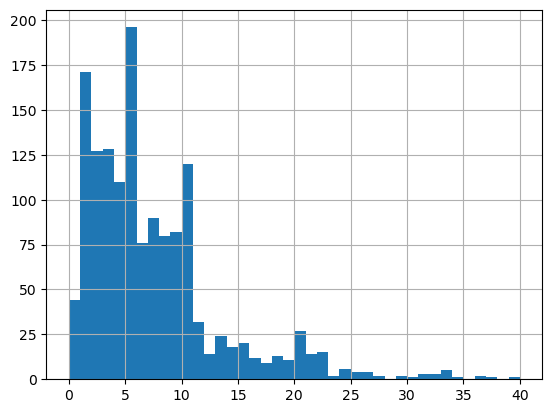

In [285]:
# Plot YearsAtCompany from attrition_pop as a histogram
attrition_pop['YearsAtCompany'].hist(bins = np.arange(0,41,1))
plt.show()

In [288]:
# Sample 400 employees weighted by YearsAtCompany
attrition_weight = attrition_pop.sample(n = 400, weights = 'YearsAtCompany')
attrition_weight

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1337,49,0.0,Travel_Rarely,809,Research_Development,1,Bachelor,Life_Sciences,High,Male,...,Excellent,Low,0,23,2,Better,8,7,0,0
1389,46,0.0,Travel_Rarely,563,Sales,1,Master,Life_Sciences,Very_High,Male,...,Excellent,Medium,0,27,5,Bad,26,0,0,12
1320,51,0.0,Travel_Frequently,1456,Research_Development,1,Master,Medical,Low,Female,...,Outstanding,High,0,23,1,Good,13,12,12,8
1413,49,0.0,Travel_Rarely,1490,Research_Development,7,Master,Life_Sciences,High,Male,...,Excellent,Medium,2,29,3,Better,8,7,0,7
1421,59,0.0,Travel_Rarely,715,Research_Development,2,Bachelor,Life_Sciences,High,Female,...,Excellent,Low,0,30,4,Better,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,44,0.0,Travel_Rarely,986,Research_Development,8,Master,Life_Sciences,Low,Male,...,Outstanding,High,1,10,2,Good,3,2,0,2
1096,34,0.0,Travel_Rarely,1326,Sales,3,Bachelor,Other,Very_High,Male,...,Excellent,Very_High,0,15,2,Better,13,9,3,12
383,26,0.0,Travel_Rarely,192,Research_Development,1,College,Medical,Low,Male,...,Excellent,Low,2,6,2,Better,5,3,1,3
1107,36,0.0,Travel_Rarely,1383,Research_Development,10,Bachelor,Life_Sciences,Very_High,Male,...,Excellent,Very_High,1,15,1,Better,12,8,5,7


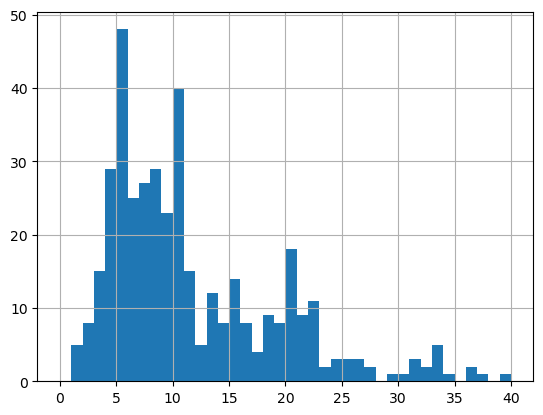

In [291]:
# Plot YearsAtCompany from attrition_weight as a histogram
attrition_weight['YearsAtCompany'].hist(bins = np.arange(0, 41,1))
plt.show()

In [292]:
print(attrition['YearsAtCompany'].mean())
print(attrition_weight['YearsAtCompany'].mean())

7.0081632653061225
11.2325


The difference is high, so the weighted sample mean is biased in this case.

# Cluster Sampling


1. Cluster sampling
One problem with stratified sampling is that we need to collect data from every subgroup. In cases where collecting data is expensive, for example, when we have to physically travel to a location to collect it, it can make our analysis prohibitively expensive. There's a cheaper alternative called cluster sampling.

# cluster sampling means we limit the number of subgrops in analysis by picking a few of them with random sampling.
We then perform simple random sampling on each subgroup as before.


Let's have a look on the coffee DataSet.

In [299]:
varieties_pop = list(coffee_rating['variety'].unique())
varieties_pop

[None,
 'Other',
 'Bourbon',
 'Catimor',
 'Ethiopian Yirgacheffe',
 'Caturra',
 'SL14',
 'Sumatra',
 'SL34',
 'Hawaiian Kona',
 'Yellow Bourbon',
 'SL28',
 'Gesha',
 'Catuai',
 'Pacamara',
 'Typica',
 'Sumatra Lintong',
 'Mundo Novo',
 'Java',
 'Peaberry',
 'Pacas',
 'Mandheling',
 'Ruiru 11',
 'Arusha',
 'Ethiopian Heirlooms',
 'Moka Peaberry',
 'Sulawesi',
 'Blue Mountain',
 'Marigojipe',
 'Pache Comun']

Suppose it is expensive to work with all of the different varieties.

# Stage-1
Randomly select three of them

In [321]:
import random
varieties_samp = random.sample(varieties_pop, k = 3)
varieties_samp

['Moka Peaberry', 'Sulawesi', 'Mandheling']

# Stage-2
Perfrom simple random sampling on each of the varieties

In [322]:
variety_condition = coffee_rating['variety'].isin(varieties_samp)
#applying this condition
coffee_rating_cluster = coffee_rating[variety_condition]
coffee_rating_cluster

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
172,84.42,Arabica,aulia arif syahri,Indonesia,darmawi,MANDHELING BRASTAGI,dry mill,To be advice,pt. olam indonesia,1400,...,Blue-Green,3.0,"March 14th, 2018",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1400.0,1400.0,1400.0
231,84.13,Arabica,pt.royal pacific indah international,Indonesia,"mus, eman",1,dry mill or hulling facility,None,pt. royal pacific indah international,None,...,Bluish-Green,0.0,"May 24th, 2018",Specialty Coffee Association of Indonesia,99fa73db21b7acd9c9ceb9dd84e409d2077d55c4,36910838db193ebdd61fa1427bac74622114c49a,m,NaN,NaN,NaN
543,82.92,Arabica,expocaccer coop dos cafeic do cerrado ltda,Brazil,fazenda pantano,None,None,999,expocaccer,11000 metros,...,Green,16.0,"August 15th, 2015",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,11000.0,11000.0,11000.0
583,82.75,Arabica,sanjava coffee,Indonesia,various,sran toraja,sapan toraja,None,pt. shriya artha nusantara,1500,...,Blue-Green,15.0,"August 8th, 2018",Specialty Coffee Association of Indonesia,99fa73db21b7acd9c9ceb9dd84e409d2077d55c4,36910838db193ebdd61fa1427bac74622114c49a,m,1500.0,1500.0,1500.0
1050,80.67,Arabica,aulia arif syahri,Indonesia,darmawi,None,surbakti / pt.olam indonesia,015/1691/006,pt. olam indonesia,1200-1500,...,Blue-Green,1.0,"November 9th, 2016",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1200.0,1500.0,1350.0


In [425]:
# To ensure that the isin filtering removes levels with zero rows,
# We apply cat.remove_unused_categories() method on the series of focus, which is variety here
coffee_rating_cluster['variety'] = coffee_rating_cluster['variety'].cat.remove_unused_categories()

AttributeError: Can only use .cat accessor with a 'category' dtype

We must recieve an error here.

In [426]:
# here we have opted for equal counts sampling, with five rows from each remaining variety
coffee_rating_cluster.groupby('variety')\
    .sample(n = 5, random_state = 2021, replace = True)

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
172,84.42,Arabica,aulia arif syahri,Indonesia,darmawi,MANDHELING BRASTAGI,dry mill,To be advice,pt. olam indonesia,1400,...,Blue-Green,3.0,"March 14th, 2018",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1400.0,1400.0,1400.0
231,84.13,Arabica,pt.royal pacific indah international,Indonesia,"mus, eman",1,dry mill or hulling facility,None,pt. royal pacific indah international,None,...,Bluish-Green,0.0,"May 24th, 2018",Specialty Coffee Association of Indonesia,99fa73db21b7acd9c9ceb9dd84e409d2077d55c4,36910838db193ebdd61fa1427bac74622114c49a,m,NaN,NaN,NaN
231,84.13,Arabica,pt.royal pacific indah international,Indonesia,"mus, eman",1,dry mill or hulling facility,None,pt. royal pacific indah international,None,...,Bluish-Green,0.0,"May 24th, 2018",Specialty Coffee Association of Indonesia,99fa73db21b7acd9c9ceb9dd84e409d2077d55c4,36910838db193ebdd61fa1427bac74622114c49a,m,NaN,NaN,NaN
172,84.42,Arabica,aulia arif syahri,Indonesia,darmawi,MANDHELING BRASTAGI,dry mill,To be advice,pt. olam indonesia,1400,...,Blue-Green,3.0,"March 14th, 2018",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1400.0,1400.0,1400.0
231,84.13,Arabica,pt.royal pacific indah international,Indonesia,"mus, eman",1,dry mill or hulling facility,None,pt. royal pacific indah international,None,...,Bluish-Green,0.0,"May 24th, 2018",Specialty Coffee Association of Indonesia,99fa73db21b7acd9c9ceb9dd84e409d2077d55c4,36910838db193ebdd61fa1427bac74622114c49a,m,NaN,NaN,NaN
543,82.92,Arabica,expocaccer coop dos cafeic do cerrado ltda,Brazil,fazenda pantano,None,None,999,expocaccer,11000 metros,...,Green,16.0,"August 15th, 2015",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,11000.0,11000.0,11000.0
543,82.92,Arabica,expocaccer coop dos cafeic do cerrado ltda,Brazil,fazenda pantano,None,None,999,expocaccer,11000 metros,...,Green,16.0,"August 15th, 2015",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,11000.0,11000.0,11000.0
543,82.92,Arabica,expocaccer coop dos cafeic do cerrado ltda,Brazil,fazenda pantano,None,None,999,expocaccer,11000 metros,...,Green,16.0,"August 15th, 2015",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,11000.0,11000.0,11000.0
543,82.92,Arabica,expocaccer coop dos cafeic do cerrado ltda,Brazil,fazenda pantano,None,None,999,expocaccer,11000 metros,...,Green,16.0,"August 15th, 2015",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,11000.0,11000.0,11000.0
543,82.92,Arabica,expocaccer coop dos cafeic do cerrado ltda,Brazil,fazenda pantano,None,None,999,expocaccer,11000 metros,...,Green,16.0,"August 15th, 2015",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,11000.0,11000.0,11000.0


In [337]:
import numpy as np

# set random seed for reproducibility
np.random.seed(2021)

# sample up to 5 items from each group, or all items if the group has less than 5 items
coffee_rating_cluster.groupby('variety')\
    .apply(lambda x: x.sample(n=min(5, len(x)), replace=False))


total_cup_points  species  \
variety                                         
Mandheling    1050             80.67  Arabica   
              231              84.13  Arabica   
              172              84.42  Arabica   
Moka Peaberry 543              82.92  Arabica   
Sulawesi      583              82.75  Arabica   

                                                         owner  \
variety                                                          
Mandheling    1050                           aulia arif syahri   
              231         pt.royal pacific indah international   
              172                            aulia arif syahri   
Moka Peaberry 543   expocaccer coop dos cafeic do cerrado ltda   
Sulawesi      583                               sanjava coffee   

                   country_of_origin        farm_name           lot_number  \
variety                                                                      
Mandheling    1050         Indonesia          darmawi                 None   
              231          Indonesia        mus, eman                    1   
              172          Indonesia          darmawi  MANDHELING BRASTAGI   
Moka Peaberry 543             Brazil  fazenda pantano                 None   
Sulawesi      583          Indonesia          various          sran toraja   

                                            mill    ico_number  \
variety                                                          
Mandheling    1050  surbakti / pt.olam indonesia  015/1691/006   
              231   dry mill or hulling facility          None   
              172                       dry mill  To be advice   
Moka Peaberry 543                           None           999   
Sulawesi      583                   sapan toraja          None   

                                                  company      altitude  ...  \
variety                                                                  ...   
Mandheling    1050                     pt. olam indonesia     1200-1500  ...   
              231   pt. royal pacific indah international          None  ...   
              172                      pt. olam indonesia          1400  ...   
Moka Peaberry 543                              expocaccer  11000 metros  ...   
Sulawesi      583              pt. shriya artha nusantara          1500  ...   

                           color category_two_defects          expiration  \
variety                                                                     
Mandheling    1050    Blue-Green                  1.0  November 9th, 2016   
              231   Bluish-Green                  0.0      May 24th, 2018   
              172     Blue-Green                  3.0    March 14th, 2018   
Moka Peaberry 543          Green                 16.0   August 15th, 2015   
Sulawesi      583     Blue-Green                 15.0    August 8th, 2018   

                                           certification_body  \
variety                                                         
Mandheling    1050               Specialty Coffee Association   
              231   Specialty Coffee Association of Indonesia   
              172                Specialty Coffee Association   
Moka Peaberry 543         Brazil Specialty Coffee Association   
Sulawesi      583   Specialty Coffee Association of Indonesia   

                                       certification_address  \
variety                                                        
Mandheling    1050  36d0d00a3724338ba7937c52a378d085f2172daa   
              231   99fa73db21b7acd9c9ceb9dd84e409d2077d55c4   
              172   36d0d00a3724338ba7937c52a378d085f2172daa   
Moka Peaberry 543   3297cfa4c538e3dd03f72cc4082c54f7999e1f9d   
Sulawesi      583   99fa73db21b7acd9c9ceb9dd84e409d2077d55c4   

                                       certification_contact  \
variety                                                        
Mandheling    1050  0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660   
     

In [314]:
coffee_raring_blue = coffee_rating[coffee_rating['variety'] == 'Blue Mountain']
coffee_raring_blue

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
630,82.67,Arabica,young kim,Mexico,kassandra,None,None,016-2484-05,None,1400 masl,...,None,1.0,"April 5th, 2012",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1400.0,1400.0,1400.0
921,81.50,Arabica,myriam kaplan-pasternak,Haiti,mixed,None,coopacvod,None,haiti coffee,400-1250m,...,Bluish-Green,0.0,"May 5th, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,400.0,1250.0,825.0


In [325]:
# Create a list of unique JobRole values
job_roles_pop = list(attrition['JobRole'].unique())

# Randomly sample four JobRole values
job_roles_samp = random.sample(job_roles_pop, k=4)

# Filter for rows where JobRole is in job_roles_samp
jobrole_condition = attrition['JobRole'].isin(job_roles_samp)
attrition_filtered = attrition[jobrole_condition]

In [330]:
# Remove categories with no rows
attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()

/var/folders/41/5qy4wjjs2fv7xjzw2hgjt1vc0000gn/T/ipykernel_7274/2426580873.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()


In [332]:
# Randomly sample 10 employees from each sampled job role
attrition_clust = attrition_filtered.groupby('JobRole')\
        .sample(n = 10, random_state = 2022)
attrition_clust

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1124,36,0.0,Travel_Rarely,1396,Research_Development,5,College,Life_Sciences,Very_High,Male,...,Excellent,Very_High,0,16,3,Best,13,11,3,7
576,45,0.0,Travel_Rarely,974,Research_Development,1,Master,Medical,Very_High,Female,...,Excellent,Very_High,2,8,2,Better,5,3,0,2
995,42,0.0,Travel_Frequently,748,Research_Development,9,College,Medical,Low,Female,...,Excellent,High,0,12,3,Better,12,9,5,8
1243,50,0.0,Travel_Rarely,1207,Research_Development,28,Below_College,Medical,Very_High,Male,...,Excellent,High,3,20,3,Better,20,8,3,8
869,45,0.0,Travel_Rarely,1015,Research_Development,5,Doctor,Medical,High,Female,...,Excellent,Low,0,10,3,Better,10,7,1,4
599,33,0.0,Travel_Rarely,1099,Research_Development,4,Master,Medical,Low,Female,...,Excellent,Very_High,0,8,5,Better,5,4,0,2
117,24,0.0,Travel_Rarely,350,Research_Development,21,College,Technical_Degree,High,Male,...,Excellent,Medium,3,2,3,Better,1,1,0,0
472,30,0.0,Travel_Rarely,921,Research_Development,1,Bachelor,Life_Sciences,Very_High,Male,...,Outstanding,High,2,7,2,Better,2,2,0,2
149,27,0.0,Non-Travel,1277,Research_Development,8,Doctor,Life_Sciences,Low,Male,...,Excellent,Very_High,3,3,4,Better,3,2,1,2
49,20,1.0,Travel_Rarely,129,Research_Development,4,Bachelor,Technical_Degree,Low,Male,...,Excellent,Medium,0,1,2,Better,1,0,0,0


# Comparing Sampling methods

In [333]:
# Top six countries
coffee_rating_top_country


,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters,weight
2,89.75,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",None,None,None,None,1600 - 1800 m,...,0.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.00,1800.00,1700.00,1
5,88.83,Arabica,ji-ae ahn,Brazil,None,None,None,None,None,None,...,1.0,"September 3rd, 2014",Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,m,NaN,NaN,NaN,1
13,87.92,Arabica,grounds for health admin,United States (Hawaii),arianna farms,None,None,None,None,2000 ft,...,2.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,609.60,609.60,609.60,1
22,87.17,Arabica,roberto licona franco,Mexico,la herradura,None,la herradura,0,None,1320,...,0.0,"July 26th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,1320.00,1320.00,1320.00,1
25,86.92,Arabica,nucoffee,Brazil,fazenda kaquend,None,None,002/1251/0073,nucoffee,1250m,...,2.0,"December 2nd, 2012",NUCOFFEE,567f200bcc17a90070cb952647bf88141ad9c80c,aa2ff513ffb9c844462a1fb07c599bce7f3bb53d,m,1250.00,1250.00,1250.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,71.00,Arabica,ricardo aaron sampieri marini,Mexico,la morena,None,"tlamatoca, hutusco, ver.",1104351023,None,1800,...,0.0,"July 11th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,1800.00,1800.00,1800.00,1
1301,70.75,Arabica,kurt kappeli,Mexico,various,None,f.i.e.c.h.,0016-2847-0001,globus coffee,1000 meters,...,1.0,"May 5th, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1000.00,1000.00,1000.00,1
1302,70.67,Arabica,volcafe ltda. - brasil,Brazil,None,2017/2018 - Lot 2,copag,None,volcafe ltda.,None,...,55.0,"October 27th, 2018",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,NaN,NaN,NaN,1
1306,68.33,Arabica,juan carlos garcia lopez,Mexico,el centenario,None,"la esperanza, municipio juchique de ferrer, ve...",1104328663,terra mia,900,...,20.0,"September 17th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,900.00,900.00,900.00,1


In [340]:
coffee_rating_top_srs = coffee_rating_top_country.sample(frac = 1/3, random_state = 2021)
coffee_rating_top_srs

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters,weight
1229,78.33,Arabica,pablo cervantes morelos,Mexico,llano hermoso,None,"llano hermoso, xochitonalco huautla, oaxaca",0,asociación agricola local de productores de ca...,1300,...,47.0,"September 11th, 2013",AMECAFE,3e18a5ae6f5e2aabca37e025f94e1974558bf5f0,e3212d17882b7657b3fba559b4072e552604d5d1,m,1300.000,1300.000,1300.00,1
232,84.08,Arabica,carcafe ltda ci,Colombia,None,3-59-0503,neiva,3-59-0503,carcafe ltda,442,...,3.0,"November 9th, 2018",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,442.000,442.000,442.00,1
697,82.42,Arabica,jose daniel cobilt castro,Mexico,cañada fria,None,huatusco,1104558673,None,1350,...,6.0,"July 11th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,1350.000,1350.000,1350.00,1
865,81.75,Arabica,diego manuel woolrich ramirez,Mexico,"arroyo triste, arroyo triste, san jose vista h...",None,"arroyo triste, arroyo triste, san jose vista h...","2037240, 2037150,1400213685",None,1100,...,1.0,"September 4th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,1100.000,1100.000,1100.00,1
155,84.58,Arabica,exportadora de cafe condor s.a,Colombia,various,None,trilladora boananza,3-68-0005,exportadora de cafe condor s.a,1800 msnm,...,6.0,"October 9th, 2013",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1800.000,1800.000,1800.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,81.00,Arabica,alejandro garcia palacios,Mexico,finca el gavilancillo,None,finca la fortuna,1506558878,industrializadora de kaffee andes s.a. de c.v.,950,...,12.0,"September 11th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,950.000,950.000,950.00,1
788,82.08,Arabica,julio perez hernandez,Mexico,None,None,"tapachula, chiapas",0,indigenas de la sierra madre de motozintla san...,1800,...,13.0,"August 30th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,1800.000,1800.000,1800.00,1
595,82.75,Arabica,coffee export,Colombia,None,None,trilladora mercedes,3-201-1817,coffee export,1.65,...,0.0,"May 27th, 2015",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,165.000,165.000,165.00,1
243,84.00,Arabica,juan luis alvarado romero,Guatemala,finca los cerros y anexos,None,beneficio exportacafe agua santa,11/52/841,exportcafe,5440 - 5760 metros,...,7.0,"June 9th, 2016",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,ft,1658.112,1755.648,1706.88,1


Because 1/3 of 880 is nearly 293

In [343]:
coffee_rating_strat = coffee_rating_top_country.groupby('country_of_origin')\
    .sample(frac = 1/3, random_state = 2021)
coffee_rating_strat.shape

(293, 44)

Staritifying provides the same number of rows as the simple random sample(srs)

In [344]:
top_counted_countries

['Mexico',
 'Colombia',
 'Guatemala',
 'Brazil',
 'Taiwan',
 'United States (Hawaii)']

In [427]:
# selectting two random countries from top six countries
top_countries_samp = random.sample(top_counted_countries, k = 2)
# top condition
top_condition = coffee_rating_top_country['country_of_origin'].isin(top_countries_samp)
coffee_cluster = coffee_rating_top_country[top_condition]
# removing unused_categories
coffee_cluster['country_of_origin'] = coffee_cluster['country_of_origin'].cat.remove_unused_categories()
coffee_cluster = coffee_cluster.groupby('country_of_origin')\
      .sample(n = len(coffee_rating_top_country) // 6)

/var/folders/41/5qy4wjjs2fv7xjzw2hgjt1vc0000gn/T/ipykernel_7274/1606374215.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_cluster['country_of_origin'] = coffee_cluster['country_of_origin'].cat.remove_unused_categories()


ValueError: Cannot take a larger sample than population when 'replace=False'

In [351]:
coffee_cluster['country_of_origin'] = coffee_cluster['country_of_origin'].astype('category')

/var/folders/41/5qy4wjjs2fv7xjzw2hgjt1vc0000gn/T/ipykernel_7274/2533864341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_cluster['country_of_origin'] = coffee_cluster['country_of_origin'].astype('category')


Simple Randpm Sampling

In [428]:
# Perform simple random sampling to get 0.25 of the population
attrition_srs = attrition_pop.sample(frac = 0.25, random_state = 2022)

We'll use the RelationshipSatisfaction column of the attrition_pop dataset, which categorizes the employee's relationship with the company. It has four levels: Low, Medium, High, and Very_High. pandas has been loaded with its usual alias, and the random package has been loaded.



In [429]:
# Perform stratified sampling to get 0.25 of each relationship group
attrition_strat = attrition_pop.groupby('RelationshipSatisfaction')\
   .sample(frac = 0.25, random_state = 2022)

In [430]:
attrition.dtypes

Age                            int32
Attrition                    float64
BusinessTravel              category
DailyRate                      int32
Department                  category
DistanceFromHome               int32
Education                   category
EducationField              category
EnvironmentSatisfaction     category
Gender                      category
HourlyRate                     int32
JobInvolvement              category
JobLevel                       int32
JobRole                     category
JobSatisfaction             category
MaritalStatus               category
MonthlyIncome                  int32
MonthlyRate                    int32
NumCompaniesWorked             int32
OverTime                    category
PercentSalaryHike              int32
PerformanceRating           category
RelationshipSatisfaction    category
StockOptionLevel               int32
TotalWorkingYears              int32
TrainingTimesLastYear          int32
WorkLifeBalance             category
Y

In [431]:
# Create a list of unique RelationshipSatisfaction values
satisfaction_unique = list(attrition['RelationshipSatisfaction'].unique())

# Randomly sample 2 unique satisfaction values
satisfaction_samp = random.sample(satisfaction_unique, k=2)

# Filter for satisfaction_samp and clear unused categories from RelationshipSatisfaction
satis_condition = attrition['RelationshipSatisfaction'].isin(satisfaction_samp)
attrition_clust_prep = attrition[satis_condition]
attrition_clust_prep['RelationshipSatisfaction'] = attrition_clust_prep['RelationshipSatisfaction'].cat.remove_unused_categories()

# Perform cluster sampling on the selected group, getting 0.25 of attrition_pop
attrition_clust = attrition_clust_prep.groupby("RelationshipSatisfaction")\
    .sample(n=len(attrition) // 4, random_state=2022)

/var/folders/41/5qy4wjjs2fv7xjzw2hgjt1vc0000gn/T/ipykernel_7274/2084526265.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_clust_prep['RelationshipSatisfaction'] = attrition_clust_prep['RelationshipSatisfaction'].cat.remove_unused_categories()


In [432]:
attrition_clust

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
20,22,0.0,Travel_Rarely,534,Research_Development,15,Bachelor,Medical,Medium,Female,...,Excellent,High,0,1,5,Better,0,0,0,0
1068,42,0.0,Travel_Rarely,419,Sales,12,Master,Marketing,Medium,Male,...,Excellent,High,2,14,4,Better,0,0,0,0
620,40,0.0,Travel_Rarely,543,Research_Development,1,Master,Life_Sciences,Low,Male,...,Excellent,High,2,8,3,Good,1,0,0,0
1129,54,0.0,Travel_Rarely,397,Human_Resources,19,Master,Medical,High,Male,...,Excellent,High,1,16,1,Best,9,7,7,1
1213,56,0.0,Travel_Rarely,713,Research_Development,8,Bachelor,Life_Sciences,High,Female,...,Excellent,High,1,19,3,Better,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,34,0.0,Travel_Rarely,404,Research_Development,2,Master,Technical_Degree,High,Female,...,Excellent,Very_High,0,14,2,Best,14,11,4,11
1412,54,0.0,Travel_Rarely,971,Research_Development,1,Bachelor,Medical,Very_High,Female,...,Excellent,Very_High,0,29,3,Good,20,7,12,7
148,33,0.0,Non-Travel,1038,Sales,8,Below_College,Life_Sciences,Medium,Female,...,Excellent,Very_High,0,3,2,Good,2,2,2,2
859,34,0.0,Travel_Rarely,971,Sales,1,Bachelor,Technical_Degree,Very_High,Male,...,Excellent,Very_High,0,10,3,Better,10,9,8,6


In [433]:
# calculate Attrition mean from the sample of various RelationshipStatus group
attrition.groupby('RelationshipSatisfaction')['Attrition'].mean()

RelationshipSatisfaction
Low          0.206522
Medium       0.148515
High         0.154684
Very_High    0.148148
Name: Attrition, dtype: float64

In [434]:
attrition.groupby('RelationshipSatisfaction')['Attrition'].agg('mean')

RelationshipSatisfaction
Low          0.206522
Medium       0.148515
High         0.154684
Very_High    0.148148
Name: Attrition, dtype: float64

In [435]:
# Doing the same for this  cluster sample
attrition_clust.groupby('RelationshipSatisfaction')['Attrition'].mean()

RelationshipSatisfaction
High         0.149864
Very_High    0.160763
Name: Attrition, dtype: float64

In [436]:
# Calculate the same thing for the simple random sample 
mean_attrition_srs = attrition_srs.groupby('RelationshipSatisfaction')['Attrition'].mean()

# Print the result
print(mean_attrition_srs)


RelationshipSatisfaction
Low          0.134328
Medium       0.164179
High         0.160000
Very_High    0.155963
Name: Attrition, dtype: float64


In [437]:
# Calculate the same thing for the stratified sample 
mean_attrition_strat = attrition_strat.groupby('RelationshipSatisfaction')['Attrition'].mean()

# Print the result
print(mean_attrition_strat)

RelationshipSatisfaction
Low          0.144928
Medium       0.078947
High         0.165217
Very_High    0.129630
Name: Attrition, dtype: float64


# Relative error of point estimates

In [438]:
len(coffee_rating.sample(n = 300))

300

In [439]:
len(coffee_rating.sample(frac = 0.25))

334

In [440]:
coffee_rating['total_cup_points'].mean()

82.15120328849018

In [441]:
# Taking a sample size of 10
coffee_rating.sample(n = 10)['total_cup_points'].mean()

81.65

In [446]:
coffee_rating.sample(n = 100)['total_cup_points'].mean()

81.9752

In [444]:
coffee_rating['total_cup_points'].mean() - coffee_rating.sample(n = 10)['total_cup_points'].mean()

1.259203288490184

In [447]:
coffee_rating.sample(n = 10)['total_cup_points'].mean()- coffee_rating.sample(n = 100)['total_cup_points'].mean()

0.0601999999999947

# As we can see increasing the sample size decreases relative error

In [451]:
population_mean = coffee_rating['total_cup_points'].mean()
population_mean

82.15120328849018

In [454]:
sample_mean = coffee_rating.sample(sample_size)['total_cup_points'].mean()
sample_mean

82.17357142857142

# Comment
The most common metric for assessing the difference between the population and a sample mean is the relative error

In [457]:
relative_error_pct =  100 * abs(population_mean - sample_mean) / population_mean
relative_error_pct

0.02722801272026516

In [456]:
errors.plot(x = 'sample_size',
           y = 'relative_error',
           kind = 'line')
plt.show()

NameError: name 'errors' is not defined

In [460]:
mean_attrition_pop = attrition['Attrition'].mean()
# Generate a simple random sample of 100 rows, with seed 2022
attrition_srs100 = attrition_pop.sample(n = 100, random_state = 2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs100 = attrition_srs100['Attrition'].mean()

# Calculate the relative error percentage
rel_error_pct100 = 100*abs(mean_attrition_pop - mean_attrition_srs100)/mean_attrition_pop

# Print rel_error_pct100
print(rel_error_pct100)

6.962025316455695


# Creating sampling distribution

In [465]:
# Creating a for loop which will run for 1000 times
mean_cup_points_1000 = []
for i in range(1000):
    mean_cup_points_1000.append(
    coffee_rating.sample(n = 30)['total_cup_points'].mean()
    )

print(mean_cup_points_1000)

[82.54700000000001, 82.53166666666667, 82.23866666666666, 82.011, 82.28566666666667, 82.23666666666666, 82.18833333333332, 82.425, 81.786, 82.28566666666666, 82.70933333333333, 82.67233333333334, 81.92233333333334, 82.30600000000001, 82.37866666666667, 82.13499999999999, 82.705, 82.24966666666666, 81.336, 81.81633333333335, 81.30299999999998, 82.54233333333335, 81.98066666666666, 82.175, 82.708, 82.00033333333334, 81.584, 82.83966666666667, 81.54233333333333, 82.32199999999999, 81.94200000000002, 81.80333333333334, 81.792, 82.63366666666667, 82.878, 82.07266666666668, 81.79966666666665, 82.18366666666667, 82.88633333333333, 81.79466666666667, 82.90833333333333, 82.38333333333334, 82.23033333333335, 81.68900000000001, 82.161, 82.07833333333333, 82.35533333333335, 81.99500000000002, 82.57600000000001, 82.17466666666665, 82.87766666666667, 82.35866666666668, 82.15900000000002, 81.95566666666667, 82.21533333333335, 82.78633333333332, 82.38533333333334, 82.18599999999999, 82.395, 82.6393333

1. Here we have created a for lopp by taking 30 samples from coffee_rating Dataset which will creat a list of mean from the total_cup_points column for 1000 times each time we run the code.
2. Each time we will tun the code it will give a slidely diffferent resiult
3. In this case 30 is the sample size and we have replicated the process for 1000 times

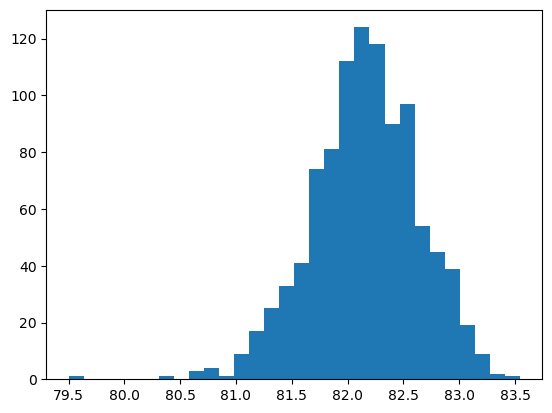

In [466]:
plt.hist(mean_cup_points_1000, bins = 30)
plt.show()

Here we can see, most of the values lie between 81 and 83 and they roughly follow a bell-shaped curve, like a Normal Distribution.

# A distribution of replicates of sample means, or other point estimates, is known as a sampling distribution.
Let's run the same code with different samle size

In [482]:
mean_cup_points_36Sample = []
for i in range(1000):
    mean_cup_points_36Sample.append(
    coffee_rating.sample(n = 36)['total_cup_points'].mean()
    )

print(mean_cup_points_36Sample)

[82.13277777777779, 82.52749999999999, 81.68249999999999, 82.50416666666666, 82.72000000000001, 82.01555555555554, 82.50694444444444, 81.61722222222221, 82.21472222222222, 82.36361111111113, 82.52555555555556, 81.59722222222221, 81.27111111111111, 81.48222222222223, 82.23388888888888, 81.91000000000001, 81.58083333333333, 82.11805555555557, 81.8338888888889, 82.65555555555557, 82.53472222222223, 82.31277777777778, 81.63388888888889, 82.89333333333333, 81.25055555555556, 82.58111111111113, 82.04861111111111, 82.54638888888888, 82.95777777777776, 82.56055555555557, 82.2636111111111, 81.99333333333333, 81.72583333333336, 81.50472222222223, 82.29722222222225, 82.09972222222223, 81.71277777777777, 81.9738888888889, 82.43083333333334, 81.95527777777777, 82.4363888888889, 81.58583333333333, 81.10194444444446, 82.89444444444445, 82.33638888888889, 82.28750000000001, 82.55583333333334, 82.44694444444445, 81.90777777777777, 82.03416666666666, 81.80194444444446, 82.57222222222224, 80.560555555555

In [480]:
mean_cup_points_100Sample = []
for i in range(1000):
    mean_cup_points_100Sample.append(
    coffee_rating.sample(n = 100)['total_cup_points'].mean()
    )

print(mean_cup_points_100Sample)

[82.4744, 82.2219, 81.86580000000001, 82.1634, 81.8276, 82.3502, 82.0182, 81.8127, 82.0197, 82.1961, 81.8109, 82.1958, 82.1693, 82.58030000000001, 82.2806, 81.99340000000001, 82.4902, 82.1182, 82.5059, 82.1983, 82.19050000000001, 82.43130000000001, 82.21900000000001, 81.8333, 81.9169, 82.0874, 82.52940000000001, 82.3655, 82.1154, 82.37110000000001, 82.113, 81.9182, 82.1876, 82.2792, 82.61570000000002, 82.03550000000001, 82.29889999999999, 82.0737, 82.3035, 82.3507, 82.9109, 82.1192, 82.41339999999998, 81.885, 82.1117, 81.6656, 81.88040000000001, 82.11030000000001, 82.5443, 82.2706, 82.38950000000001, 82.137, 82.1752, 82.08409999999999, 82.1576, 81.90010000000001, 81.98559999999999, 82.2418, 81.87200000000001, 82.2676, 81.47370000000001, 82.26080000000002, 82.32950000000001, 81.9675, 82.08550000000001, 81.8961, 82.18220000000001, 82.71430000000001, 82.18450000000001, 81.9601, 82.2042, 82.0609, 82.30120000000001, 82.21050000000001, 82.2265, 82.177, 82.3043, 82.2868, 82.8123, 81.9558, 82.

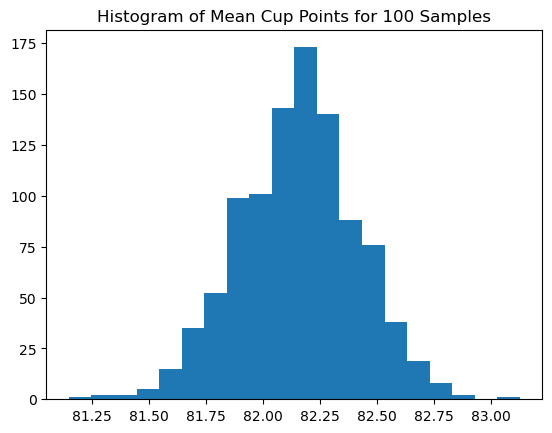

In [484]:
plt.hist(mean_cup_points_100Sample, bins = 20)
plt.title("Histogram of Mean Cup Points for 100 Samples")
plt.show()

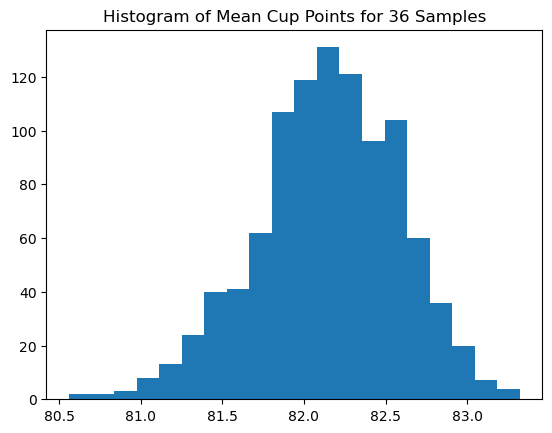

In [485]:
plt.hist(mean_cup_points_36Sample, bins = 20)
plt.title("Histogram of Mean Cup Points for 36 Samples")
plt.show()

# Bigger sample size provides more accurate result

In [488]:
# Create an empty list
mean_attritions = []
# Loop 500 times to create 500 sample means
for i in range(500):
	mean_attritions.append(
    	attrition.sample(n=60)['Attrition'].mean()
	)
  
# Print out the first few entries of the list
print(mean_attritions[0:5])

[0.11666666666666667, 0.06666666666666667, 0.1, 0.18333333333333332, 0.18333333333333332]


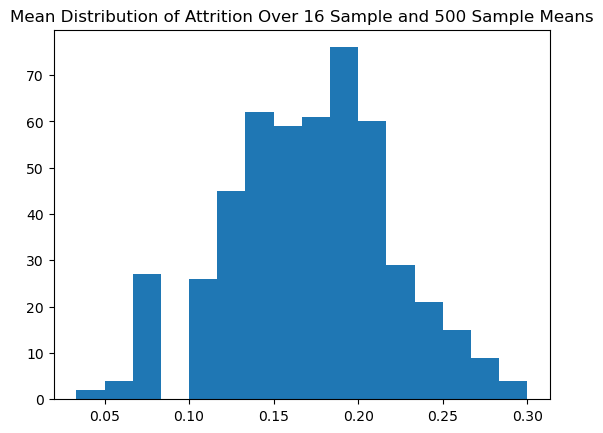

In [527]:
# Create a histogram of the 500 sample means
plt.hist(mean_attritions, bins = 16)
plt.title('Mean Distribution of Attrition Over 16 Sample and 500 Sample Means')
plt.show()

# Approximate Sampling distribution

In [497]:
! pip install janitor

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 2.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.0/165.0 kB 2.3 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for janitor: filename=Janitor-0.1.1-py3-none-any.whl size=3811 sha256=495d326f6a9197770d5730a04fb3dfe527d9743ce79a16660c1de517267fc662
  Stored in directory: /Users/mishudhar/Library/Caches/pip/wheels/61/61/a6/bd3a0f4cf7fca2b6cc2a2adbd97beec73a9039cf358b761d41
  Created wheel for greenlet: filename=greenlet-2.0.2-cp39-cp39-macosx_10_9_x86_64.whl size=189999 sha256=d45cbf735364f5c56ad3acf90d63490e1e41cfb3f7e4242d460749c7fd417ef6
  Stored in directory: /Users/mishudhar/Library/Caches/pip/wheels/c4/e2/38/932349e5e893e6d464ea70f98f76a8d7b9ba73e62cc9db5579
Successfully built janitor greenlet
  Attempting uninstall: greenlet
    Found existing installation: greenlet 1.1.1
    Uninstalling greenlet-1.1.1:
      Successfull

In [492]:
! pip install expand grid


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 1.3 MB/s eta 0:00:0000:0100:010m
  Preparing metadata (setup.py) ... done
  Created wheel for grid: filename=grid-0.7.1-py3-none-any.whl size=4684798 sha256=115ded5c2edae38a44b7bc27c760af9df3bfda5e08168f65ef427c249adc25ed
  Stored in directory: /Users/mishudhar/Library/Caches/pip/wheels/64/1c/14/cc506b67b34d1105df7d3f7b49e7af2a402681f4339c9a35e2
Successfully built grid


In [503]:
! pip install pyjanitor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.4/158.4 kB 508.9 kB/s eta 0:00:00a 0:00:01


In [515]:
from janitor import expand_grid
import itertools
dice = {'dice1': [1,2,3,4,5,6],
       'dice2': [1,2,3,4,5,6],
       'dice3': [1,2,3,4,5,6],
       'dice4': [1,2,3,4,5,6]}
dice = dice.expand_grid(dice)


AttributeError: 'dict' object has no attribute 'expand_grid'

In [516]:
dice

{'dice1': [1, 2, 3, 4, 5, 6],
 'dice2': [1, 2, 3, 4, 5, 6],
 'dice3': [1, 2, 3, 4, 5, 6],
 'dice4': [1, 2, 3, 4, 5, 6]}

In [517]:
import pandas as pd
import janitor

dice = pd.DataFrame({'dice1': [1,2,3,4,5,6],
                     'dice2': [1,2,3,4,5,6],
                     'dice3': [1,2,3,4,5,6],
                     'dice4': [1,2,3,4,5,6]})
dice = dice.expand_grid([dice1, dice2, dice3, dice4])
dice

NameError: name 'dice1' is not defined

In [ ]:
# dice['mean_roll'] = dice['mean_role'].astype('category')
# we are interested tin the counts of each value, so we use dot-value_counts, passing the soort=False argument
# dice['mean_roll'].value_counts(sort = False).plot(kind = 'bar')

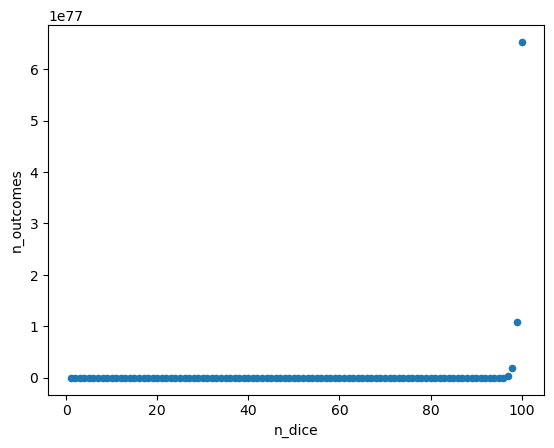

In [519]:
n_dice = list(range(1,101))

n_outcomes = []

for n in n_dice:
    n_outcomes.append(6**n)
    
outcomes = pd.DataFrame({'n_dice': n_dice,
                        'n_outcomes': n_outcomes})

outcomes.plot(x = 'n_dice',
             y = 'n_outcomes',
             kind = 'scatter')
plt.show()

# Simulating the mean of four dice rolls

In [524]:
import numpy as np
sample_means_1000 = []
for i in range(1000):
    
    sample_means_1000.append(
    np.random.choice(list(range(1,7)), size = 4, replace = True).mean())

print(sample_means_1000)

[3.5, 2.5, 3.0, 2.25, 3.0, 3.0, 2.75, 4.25, 2.75, 2.5, 3.0, 2.75, 2.75, 4.5, 2.25, 4.0, 3.75, 4.5, 4.25, 3.75, 3.25, 4.5, 3.75, 3.0, 3.5, 3.0, 2.25, 3.25, 3.5, 4.25, 3.5, 2.75, 5.0, 2.5, 2.75, 4.5, 4.0, 1.5, 3.75, 3.75, 4.5, 3.5, 3.75, 4.5, 3.5, 2.5, 3.0, 4.75, 3.0, 3.75, 2.75, 3.25, 3.75, 4.0, 1.75, 4.0, 2.5, 3.25, 4.0, 1.5, 3.5, 3.75, 4.0, 3.0, 3.5, 3.75, 1.75, 3.25, 3.0, 2.75, 3.0, 2.75, 2.25, 4.5, 1.5, 2.25, 2.25, 4.25, 3.25, 4.75, 3.5, 3.25, 2.25, 2.5, 2.5, 2.75, 3.75, 2.25, 3.0, 3.25, 2.0, 4.0, 4.25, 2.25, 3.75, 3.25, 4.25, 5.25, 3.5, 4.5, 5.5, 3.25, 3.25, 4.25, 2.5, 3.5, 4.75, 4.75, 4.5, 3.0, 4.0, 3.0, 3.0, 4.0, 2.75, 3.0, 4.75, 2.75, 3.5, 2.75, 3.0, 3.5, 2.25, 3.25, 3.25, 5.5, 4.0, 4.25, 3.5, 4.25, 4.5, 3.25, 4.5, 4.0, 3.75, 3.5, 3.25, 4.5, 4.5, 4.0, 4.75, 4.5, 4.75, 3.0, 3.75, 4.75, 4.25, 3.75, 2.25, 3.0, 1.75, 2.5, 2.5, 3.25, 2.75, 4.25, 2.75, 4.0, 3.25, 3.5, 4.75, 4.0, 3.25, 4.0, 1.5, 2.0, 3.0, 4.5, 2.75, 4.5, 3.75, 2.75, 4.5, 2.5, 3.25, 4.5, 3.5, 3.75, 3.5, 4.75, 4.25, 4.25

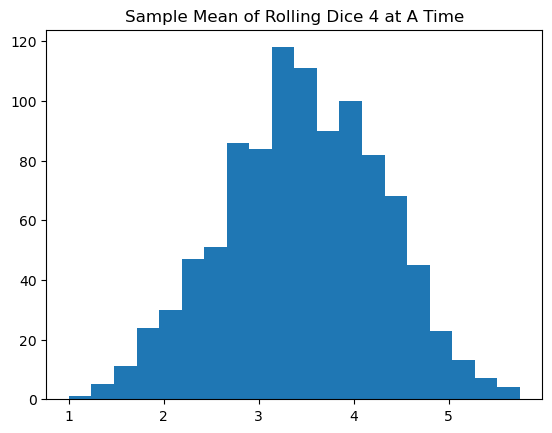

In [526]:
plt.hist(sample_means_1000, bins = 20)
plt.title('Sample Mean of Rolling Dice 4 at A Time')
plt.show()

# This is an important part. In this case we have rolled the dice four times and have taken the sample. We have repeated this process for 1000 times by creating a for Loop. Then we took the mean of each sample(for example [1,2,4,3])

In [528]:
# Expand a grid representing 5 8-sided dice
dice = expand_grid(
  {'die1': [1, 2, 3, 4, 5, 6, 7, 8],
   'die2': [1, 2, 3, 4, 5, 6, 7, 8],
   'die3': [1, 2, 3, 4, 5, 6, 7, 8],
   'die4': [1, 2, 3, 4, 5, 6, 7, 8],
   'die5': [1, 2, 3, 4, 5, 6, 7, 8]
  })

# Print the result
print(dice)

{'die1': [1, 2, 3, 4, 5, 6, 7, 8], 'die2': [1, 2, 3, 4, 5, 6, 7, 8], 'die3': [1, 2, 3, 4, 5, 6, 7, 8], 'die4': [1, 2, 3, 4, 5, 6, 7, 8], 'die5': [1, 2, 3, 4, 5, 6, 7, 8]}


In [529]:
# Add a column of mean rolls and convert to a categorical
dice['mean_roll'] = (dice['die1'] + dice['die2'] + 
                     dice['die3'] + dice['die4'] + 
                     dice['die5']) / 5
dice['mean_roll'] = dice['mean_roll'].astype('category')

# Print result
print(dice)

TypeError: unsupported operand type(s) for /: 'list' and 'int'

[4.6, 5.2, 5.0, 4.2, 4.2, 4.4, 4.8, 4.6, 5.2, 5.0]


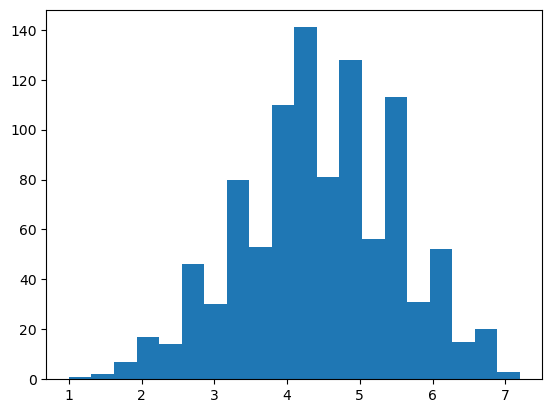

In [539]:
# Roll the eight sided dice 5 times with replace values and take the mean
five_rolls = np.random.choice(list(range(1,9)), size = 5, replace = True)
# Replicate the sampling code 1000 times, assigning each result to the list sample_means_1000.
sample_means_1000 = []
for i in range(1000):
    sample_means_1000.append(np.random.choice(list(range(1,9)), size = 5, replace = True).mean()
    )

# Print first 10 values    
print(sample_means_1000[0:10])

# Draw a histogram of sample_means_1000 with 20 bins
plt.hist(sample_means_1000, bins = 20)
plt.show()

# When the dataset is to big, an exact sampling distribution can not be calculated. Ao, an approximate sampling distribution must be used. 

# Central Limit Theorem

In [541]:
pop_mean = coffee_rating['total_cup_points'].mean()

82.15120328849018

In [560]:
samp_5_mean = coffee_rating.sample(n = 5)['total_cup_points'].mean()

In [561]:
samp_20_mean = coffee_rating.sample(n = 20)['total_cup_points'].mean()

In [562]:
samp_320_mean = coffee_rating.sample(n = 320)['total_cup_points'].mean()

In [563]:
std_samp_5_mean = np.std(samp_5_mean, ddof = 1)
std_samp_5_mean

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

In [549]:
coffee_rating.sample(n = 320)['total_cup_points'].std(ddof = 0)

2.9078546159967207

In [550]:
coffee_rating['total_cup_points'].std(ddof = 0)

2.685858187306436

In [567]:
sample_distribution_5_mean = []
for i in range(100):
    sample_distribution_5_mean.append(
    attrition.sample(n = 5)['Attrition'].mean())
    
sample_distribution_5_mean[0:10]

[0.2, 0.2, 0.2, 0.0, 0.0, 0.2, 0.4, 0.0, 0.2, 0.0]

In [568]:
np.std(sample_distribution_5, ddof = 1)

0.17017874138710892

# Introduction to Bootstrapping

# Sampling with replacement

# Sampling without replacement

We are treating the Coffee_rating dataset as the population of all coffee.
So far, we've been treating the coffee_ratings dataset as the population of all coffees. Of course, it doesn't include every coffee in the world, so we could treat the coffee dataset as just being a big sample of coffees. To imagine what the whole population is like, we need to approximate the other coffees that aren't in the dataset. Each of the coffees in the sample dataset will have properties that are representative of the coffees that we don't have. Resampling lets us use the existing coffees to approximate those other theoretical coffees

In [579]:
# Let's focus on four columns
coffee_focus = coffee_rating[['variety', 'country_of_origin', 'flavor']]
# To see which rows are ended up in the sample, we will add a Row Index column call index
coffee_focus = coffee_focus.reset_index()
# To sample with replacement we will set the replace argument as True
coffee_resamp = coffee_focus.sample(frac = 1, replace = True)
print(coffee_resamp.head())

# counting the values oin the index columns show how many times each coffee ended up in the resampled dataset
coffee_resamp['index'].value_counts()

      index  variety country_of_origin  flavor
121     121     SL34             Kenya    7.83
111     111   Typica            Mexico    8.00
463     463  Bourbon         Guatemala    7.83
1241   1241    Other            Mexico    7.33
1055   1055  Caturra          Colombia    7.50


263     5
553     5
1258    5
1096    4
496     4
       ..
335     1
1224    1
225     1
1281    1
1304    1
Name: index, Length: 838, dtype: int64

That means some cofees are included in several times

In [581]:
# Number of unique cofees
num_unique_coffees = len(coffee_resamp.drop_duplicates(subset = "index"))
num_unique_coffees

838

In [582]:
len(coffee_rating) - num_unique_coffees

500

That means 500 coffees weren't included in the resampling

# Now we are going to use resampling for a technique call bootstrapping

1. In some sense, bootstraooing is the opposite of sampling from a population.
2. In sampling we go from a population to smaller sample. We treat the dataset as the population and move
3. With bootstrapping, we treat the dataset as a sample and use it to build theoritical population.

# Booststrapping process
1. Make a resample of the sample size as the original sample
2. Calculate the statistic of the interest for this bootstrap sample
3. Repeat steps 1 and 2 many times

In [585]:
mean_flavors_1000 = []
for i in range(1000):
    mean_flavors_1000.append(np.mean(coffee_resamp(frac = 1, replace = True)['flavor']))

mean_flavors_1000

TypeError: 'DataFrame' object is not callable

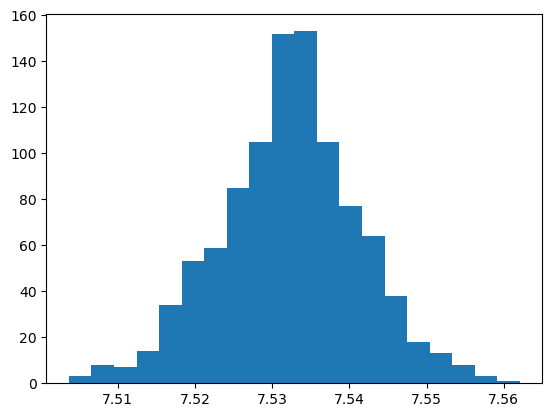

In [589]:
mean_flavors_1000 = []
for i in range(1000):
    mean_flavors_1000.append(
    coffee_resamp.sample(frac = 1, replace= True)['flavor'].mean())
    

# Plot
plt.hist(mean_flavors_1000, bins = 20)
plt.show()

It is close to following a normal distribution.

In [593]:
spotify_sample = pd.read_feather('/Users/mishudhar/Downloads/Sampling_In_Python/spotify_2000_2020.feather')
spotify_sample.head()

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.97200,['David Bauer'],0.567,313293.0,5.221550,0.227,0.0,0w0D8H1ubRerCXHWYJkinO,0.601000,10.0,0.110,-13.441,1.0,Shout to the Lord,47.0,2000,0.0290,136.123,0.0396,2000.0
1,0.32100,['Etta James'],0.821,360240.0,6.004000,0.418,0.0,4JVeqfE2tpi7Pv63LJZtPh,0.000372,9.0,0.222,-9.841,0.0,Miss You,51.0,2000-12-12,0.0407,117.382,0.8030,2000.0
2,0.00659,['Quasimoto'],0.706,202507.0,3.375117,0.602,1.0,5pxtdhLAi0RTh1gNqhGMNA,0.000138,11.0,0.400,-8.306,0.0,Real Eyes,44.0,2000-06-13,0.3420,89.692,0.4790,2000.0
3,0.00390,['Millencolin'],0.368,173360.0,2.889333,0.977,0.0,3jRsoe4Vkxa4BMYqGHX8L0,0.000000,11.0,0.350,-2.757,0.0,Penguins & Polarbears,52.0,2000-02-22,0.1270,165.889,0.5480,2000.0
4,0.12200,['Steve Chou'],0.501,344200.0,5.736667,0.511,0.0,4mronxcllhfyhBRqyZi8kU,0.000000,7.0,0.279,-9.836,0.0,黃昏,53.0,2000-12-25,0.0291,78.045,0.1130,2000.0


In [594]:
len(spotify_sample)

41656

In [596]:
spotify_sample = spotify_sample.reset_index()
spotify_sample.head()

,index,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,...,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0,0.97200,['David Bauer'],0.567,313293.0,5.221550,0.227,0.0,0w0D8H1ubRerCXHWYJkinO,0.601000,...,0.110,-13.441,1.0,Shout to the Lord,47.0,2000,0.0290,136.123,0.0396,2000.0
1,1,0.32100,['Etta James'],0.821,360240.0,6.004000,0.418,0.0,4JVeqfE2tpi7Pv63LJZtPh,0.000372,...,0.222,-9.841,0.0,Miss You,51.0,2000-12-12,0.0407,117.382,0.8030,2000.0
2,2,0.00659,['Quasimoto'],0.706,202507.0,3.375117,0.602,1.0,5pxtdhLAi0RTh1gNqhGMNA,0.000138,...,0.400,-8.306,0.0,Real Eyes,44.0,2000-06-13,0.3420,89.692,0.4790,2000.0
3,3,0.00390,['Millencolin'],0.368,173360.0,2.889333,0.977,0.0,3jRsoe4Vkxa4BMYqGHX8L0,0.000000,...,0.350,-2.757,0.0,Penguins & Polarbears,52.0,2000-02-22,0.1270,165.889,0.5480,2000.0
4,4,0.12200,['Steve Chou'],0.501,344200.0,5.736667,0.511,0.0,4mronxcllhfyhBRqyZi8kU,0.000000,...,0.279,-9.836,0.0,黃昏,53.0,2000-12-25,0.0291,78.045,0.1130,2000.0


# Bootstrapping

In [599]:
spotify_1_resample = spotify_sample.sample(frac = 1, replace = True)
spotify_1_resample.head()

,index,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,...,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
7576,7576,0.9580,"['César Franck', 'Joshua Bell', 'Jeremy Denk']",0.250,364093.0,6.068217,0.135,0.0,0xX7kREWmOGBWzYNcpZwRN,0.034900,...,0.0477,-18.615,1.0,"Violin Sonata in A Major, FWV 8: IV. Allegrett...",53.0,2012-01-06,0.0488,94.404,0.179,2012.0
41013,41013,0.0494,['Ariana Grande'],0.443,211880.0,3.531333,0.663,0.0,40fHWRL8bKcl5J4t4OKUiW,0.000000,...,0.1530,-5.946,0.0,Why Try,59.0,2014-08-25,0.0432,159.856,0.331,2014.0
29856,29856,0.0708,['NEEDTOBREATHE'],0.458,208253.0,3.470883,0.751,0.0,3rXoaocGAOEq6CorwCiI4J,0.010500,...,0.1690,-4.681,1.0,Washed by the Water,51.0,2007-08-27,0.0320,140.895,0.387,2007.0
18713,18713,0.4470,['Bon Iver'],0.328,177286.0,2.954767,0.461,0.0,6Md0VfGaWXZgJc53IMqPkO,0.000075,...,0.1550,-8.790,1.0,PDLIF,65.0,2020-04-17,0.0434,126.015,0.232,2020.0
18206,18206,0.2720,['Jai Waetford'],0.541,187640.0,3.127333,0.518,0.0,3nivloq0Lqd2CYWHTgAlwU,0.000000,...,0.0835,-4.120,1.0,Shy,59.0,2015-01-16,0.0451,75.134,0.305,2015.0


In [600]:
# Repeated_values
spotify_1_resample['index'].value_counts().head()

15122    7
18407    7
14872    7
7099     7
2120     6
Name: index, dtype: int64

In [602]:
spotify_sample['name']

0                     Shout to the Lord
1                              Miss You
2                             Real Eyes
3                 Penguins & Polarbears
4                                    黃昏
                      ...              
41651     Skechers (feat. Tyga) - Remix
41652    Sweeter (feat. Terrace Martin)
41653                  How Would I Know
41654                       I Found You
41655             More Hearts Than Mine
Name: name, Length: 41656, dtype: object

In [605]:
unique_songs_in_resample = len(spotify_1_resample.drop_duplicates(subset = 'index'))
unique_songs_in_resample

26277

In [606]:
len(spotify_sample) - unique_songs_in_resample

15379

That means 15379 songs were not included in this resampling

In [607]:
# Calculate of the danceability column of spotify_1_resample
mean_danceability_1 = np.mean(spotify_1_resample['danceability'])

# Print the result
print(mean_danceability_1)

0.5915318777607051


In [609]:
# Replicate this 1000 times
mean_danceability_1000 = []
for i in range(1000):
	mean_danceability_1000.append(
        np.mean(spotify_sample.sample(frac=1, replace=True)['danceability'])
	)
  
# Print the result
print(mean_danceability_1000[0:10])

[0.5909317337238332, 0.590398569233719, 0.5902774510274605, 0.5913319329748393, 0.591701754849238, 0.5911462214326828, 0.5904944281736065, 0.5924192433262869, 0.590509859323991, 0.5905937512003041]


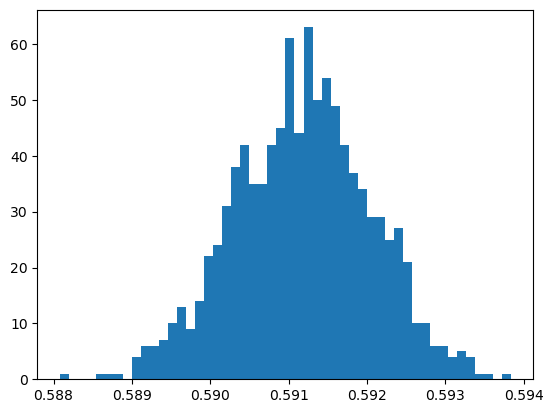

In [612]:
plt.hist(mean_danceability_1000, bins = 50)
plt.show()

# Compairng Sampling and Bootstrap Distribution

In [613]:
coffee_focus

,index,variety,country_of_origin,flavor
0,0,None,Ethiopia,8.83
1,1,Other,Ethiopia,8.67
2,2,Bourbon,Guatemala,8.50
3,3,None,Ethiopia,8.58
4,4,Other,Ethiopia,8.50
...,...,...,...,...
1333,1333,None,Ecuador,7.58
1334,1334,None,Ecuador,7.67
1335,1335,None,United States,7.33
1336,1336,None,India,6.83


In [619]:
# 500 row sample from the main sample
sample_coffee_focus = coffee_focus.sample(n = 500, replace = True)
sample_coffee_focus

,index,variety,country_of_origin,flavor
1184,1184,Bourbon,Guatemala,7.42
680,680,Catimor,China,7.42
1306,1306,Bourbon,Mexico,6.83
701,701,Caturra,Colombia,7.33
1212,1212,Typica,China,6.92
...,...,...,...,...
471,471,Mundo Novo,Brazil,7.67
706,706,Catuai,Brazil,7.50
457,457,None,Colombia,7.75
1302,1302,None,Brazil,7.00


# The Bootstrap of mean coffee flavor

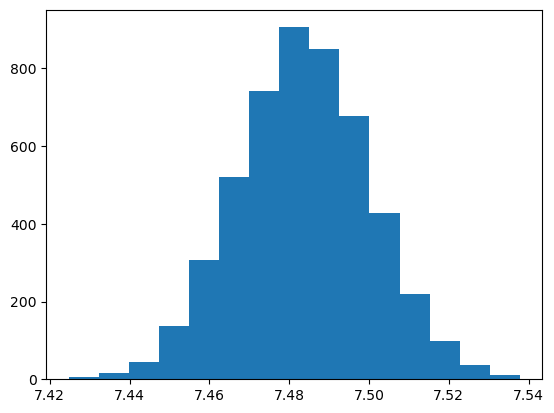

In [622]:
# Create an empty list
mean_flavor_5000 = []
# replicate the process by for loop
for i in range(5000):
    mean_flavor_5000.append(
    sample_coffee_focus.sample(frac = 1, replace = True)['flavor'].mean())
    
bootstrap_distribution = mean_flavor_5000

# Plot
plt.hist(bootstrap_distribution, bins = 15)
plt.show()

In [626]:
 # Mean_flavor of the original sample
print('Mean Flavor of the Original Sample: ', coffee_rating['flavor'].mean())
print('Sample Flavor Mean: ', sample_coffee_focus['flavor'].mean())

Mean Flavor of the Original Sample:  7.526046337817636
Sample Flavor Mean:  7.483279999999997


# Notice that each of this value in bootstrap distribution corresponds to a potential mean from the theoritical population

If we take the mean of this mean

In [627]:
np.mean(bootstrap_distribution)

7.483633767999998

In [641]:
sample_coffee_focus['flavor'].std(ddof = 0)

0.37094587421886765

In [632]:
standard_error = np.std(bootstrap_distribution, ddof = 1)

print(standard_error * np.sqrt(500))
print('Which is almost similar')

0.3699096303802059
Which is almost similar


In [636]:
spotify_500_sample = spotify_population.sample(n = 500, replace = False)

In [637]:
mean_popularity_2000_samp = []

# Generate a sampling distribution of 2000 replicates
for i in range(2000):
    mean_popularity_2000_samp.append(
    	# Sample 500 rows and calculate the mean popularity 
    	spotify_population.sample(n=500)['popularity'].mean()
    )

# Print the sampling distribution results
print(mean_popularity_2000_samp)

[55.186, 54.9, 54.958, 54.876, 55.408, 54.926, 54.916, 55.464, 54.776, 54.766, 54.584, 54.66, 54.742, 55.012, 54.884, 55.262, 54.69, 55.2, 54.95, 55.242, 55.736, 54.5, 55.114, 54.89, 55.306, 55.048, 54.974, 54.374, 55.442, 55.434, 55.204, 55.31, 54.344, 55.26, 55.296, 54.538, 54.38, 55.122, 54.532, 54.714, 54.434, 54.598, 54.578, 53.54, 54.0, 54.404, 53.864, 53.996, 54.43, 55.28, 54.658, 54.338, 54.28, 54.512, 54.292, 54.812, 55.076, 56.022, 53.986, 54.914, 54.624, 54.724, 55.008, 54.486, 55.23, 54.51, 54.434, 54.908, 54.886, 54.458, 55.912, 54.71, 55.274, 55.406, 54.798, 55.226, 55.868, 54.114, 54.486, 54.062, 54.49, 55.134, 54.534, 54.774, 54.798, 55.09, 54.862, 54.438, 55.156, 55.984, 54.214, 54.108, 54.66, 55.268, 55.174, 54.974, 54.808, 54.462, 55.272, 54.606, 54.002, 54.458, 54.388, 54.186, 54.938, 54.528, 55.288, 54.222, 54.346, 55.234, 55.328, 54.906, 53.896, 55.17, 54.698, 55.794, 54.212, 54.42, 54.754, 54.524, 54.946, 54.16, 54.764, 54.858, 54.058, 54.922, 54.992, 54.616, 55.

In [639]:
mean_popularity_2000_boot = []

# Generate a bootstrap distribution of 2000 replicates
for i in range(2000):
    mean_popularity_2000_boot.append(
    	# Resample 500 rows and calculate the mean popularity     
    	spotify_500_sample.sample(n=500, replace = True)['popularity'].mean()
    )

# Print the bootstrap distribution results
print(mean_popularity_2000_boot)

[53.936, 54.858, 55.146, 55.02, 54.114, 53.93, 54.618, 55.008, 55.146, 55.132, 54.842, 54.938, 53.55, 55.152, 54.898, 54.642, 54.852, 54.314, 54.858, 54.174, 54.076, 55.07, 55.008, 54.816, 54.626, 55.008, 54.616, 54.172, 54.138, 54.436, 55.246, 54.544, 54.142, 54.47, 54.938, 55.108, 54.944, 54.28, 55.122, 53.986, 54.678, 54.148, 54.686, 54.772, 53.936, 54.568, 54.644, 53.746, 55.53, 54.764, 54.388, 54.184, 54.81, 54.326, 54.502, 55.228, 54.926, 55.152, 54.928, 54.464, 54.332, 54.052, 54.882, 54.528, 55.982, 54.096, 54.662, 54.84, 54.884, 54.4, 53.71, 55.274, 54.73, 55.176, 54.724, 54.156, 53.994, 54.484, 54.93, 53.518, 54.386, 54.262, 53.398, 53.46, 54.992, 54.54, 54.086, 54.208, 55.252, 54.858, 55.074, 53.624, 55.37, 55.598, 55.226, 55.112, 55.16, 54.04, 54.744, 53.334, 54.786, 55.17, 54.286, 54.934, 54.938, 54.856, 54.78, 54.582, 55.106, 54.844, 55.262, 54.34, 54.678, 54.688, 54.598, 54.744, 54.488, 54.462, 54.938, 54.874, 54.0, 54.724, 54.51, 54.908, 55.382, 53.636, 55.058, 54.898, 

# Confidence Interval

In [643]:
bootstrap_distribution

[7.4677799999999985,
 7.463139999999998,
 7.466439999999996,
 7.4425799999999995,
 7.4701400000000024,
 7.492199999999999,
 7.475839999999994,
 7.513979999999998,
 7.494479999999996,
 7.48284,
 7.498079999999998,
 7.483940000000002,
 7.523419999999999,
 7.45954,
 7.470299999999996,
 7.481420000000001,
 7.48864,
 7.4983200000000005,
 7.47378,
 7.476300000000002,
 7.4627199999999965,
 7.483219999999999,
 7.500499999999994,
 7.469100000000001,
 7.4919799999999945,
 7.4734,
 7.4732199999999995,
 7.500840000000001,
 7.512879999999997,
 7.4936,
 7.487139999999996,
 7.459440000000001,
 7.5016,
 7.483280000000004,
 7.504479999999998,
 7.4663799999999965,
 7.474259999999998,
 7.490579999999997,
 7.4953199999999995,
 7.4751599999999945,
 7.469399999999998,
 7.484299999999998,
 7.459999999999996,
 7.47906,
 7.4941799999999965,
 7.477080000000004,
 7.485779999999997,
 7.472319999999999,
 7.526539999999998,
 7.464619999999997,
 7.486280000000002,
 7.494979999999999,
 7.497919999999999,
 7.485239999

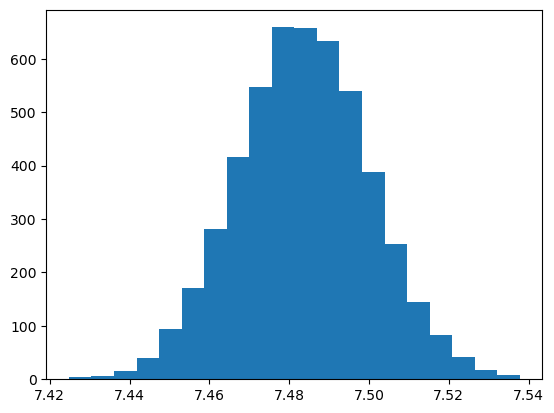

In [644]:
plt.hist(bootstrap_distribution, bins = 20)
plt.show()

In [645]:
# Take the mean
np.mean(bootstrap_distribution)


7.483633767999998

# Create a cofindence interval by adding and substracting standard deviation from the mean, we can see that there a lot of values outside 7.4670909064187585 and 7.5001766295812375

In [648]:
# Mean - std
np.mean(bootstrap_distribution) - np.std(bootstrap_distribution, ddof = 1)

7.4670909064187585

In [649]:
# mean + std
np.mean(bootstrap_distribution) + np.std(bootstrap_distribution, ddof = 1)

7.5001766295812375

# If we want to include 95% of the values in the confidence interval we can use quantiles

In [650]:
np.quantile(bootstrap_distribution, 0.025)

7.451539999999999

In [651]:
np.quantile(bootstrap_distribution, 0.975)

7.516380499999997

# Another Method: Caclculating confidence interval

In [655]:
point_estimate = np.mean(bootstrap_distribution)
standard_error = np.std(bootstrap_distribution, ddof = 1)
from scipy.stats import norm
lower = norm.ppf(0.025, loc = point_estimate, scale = standard_error)
upper = norm.ppf(0.975, loc = point_estimate, scale = standard_error)
print(lower, upper)

7.451210355099538 7.516057180900458
